<a href="https://colab.research.google.com/github/aunghlaingtun/NYP_ITI_105/blob/main/NYP_ITI_105_Model_Training_Enhanced_ProV3_0_finalRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITI-105 Machine Learning Project: HDB Resale Price Prediction
## Enhanced Model Training with Comprehensive Hyperparameter Tuning & MLflow

**Student Information:**
- **Name:** Aung Hlaing Tun
- **Student ID:** 6319250G
- **Project Group ID:** AlogoRiddler
- **Date:** 25 Aug 2025

**Enhanced Features:**
- ✅ **3-Step Model Training Workflow**
- ✅ **Comprehensive Hyperparameter Tuning** (GridSearchCV + RandomizedSearchCV)
- ✅ **Professional MLflow Integration** (No Warnings)
- ✅ **Dataset Logging & Tracking**
- ✅ **Model Comparison Dashboard**
- ✅ **Performance Optimization**

## 1. Installation & Dependencies

In [6]:
# Install required packages
!pip install mlflow pyngrok geopy scikit-learn -q

print("✅ All packages installed successfully!")

✅ All packages installed successfully!


## 2. Google Drive & Ngrok Configuration

In [7]:
# Import required libraries
from google.colab import userdata, drive, files
from pyngrok import ngrok
import mlflow
import os
import subprocess
import time

# Mount Google Drive
#drive.mount('/content/drive')

# Configure ngrok with your auth token
NGROK_TOKEN = userdata.get('test2')  # Store in Colab secrets
!ngrok authtoken {NGROK_TOKEN}

print("✅ Google Drive mounted and ngrok configured!")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
✅ Google Drive mounted and ngrok configured!


## 3. Import Libraries & Setup

In [8]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as asns
plt.style.use('default')
asns.set_palette("husl")

# Machine Learning
import sklearn
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV,
    cross_val_score
)
from sklearn.experimental import enable_halving_search_cv # Import experimental modules
from sklearn.model_selection import (
    HalvingGridSearchCV, HalvingRandomSearchCV
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# MLflow for experiment tracking
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🤖 Scikit-learn version: {sklearn.__version__}")
print(f"📈 MLflow version: {mlflow.__version__}")

✅ All libraries imported successfully!
📊 Pandas version: 2.2.2
🤖 Scikit-learn version: 1.6.1
📈 MLflow version: 3.3.1


## 4. Enhanced MLflow Setup with 3-Step Workflow

In [9]:
import os
from google.colab import userdata, drive, files
from pyngrok import ngrok
import mlflow
import subprocess
import time

def setup_enhanced_mlflow_3step():
    """Setup enhanced MLflow with 3-step workflow experiments"""
    print("🚀 ENHANCED MLFLOW SETUP - 3-STEP WORKFLOW")
    print("=" * 70)

    # Set tracking URI for Google Drive p
    tracking_uri = "file:///content/drive/MyDrive/mlflow_Final1"
    os.makedirs("/content/drive/MyDrive/mlflow_Final1", exist_ok=True)
    mlflow.set_tracking_uri(tracking_uri)
    print(f"✓ MLflow tracking URI: {tracking_uri}")

    # Create experiments for each step
    experiments = {}

    # Step 1: Baseline Models
    exp_name_1 = "HDB_Step1_Baseline_Models"
    try:
        exp_1 = mlflow.get_experiment_by_name(exp_name_1)
        if exp_1 is None:
            exp_id_1 = mlflow.create_experiment(exp_name_1)
        else:
            exp_id_1 = exp_1.experiment_id
        experiments['baseline'] = exp_id_1
        print(f"✓ Step 1: {exp_name_1} (ID: {exp_id_1})")
    except Exception as e:
        print(f"❌ Error creating Step 1 experiment: {e}")

    # Step 2: Hyperparameter Tuning
    exp_name_2 = "HDB_Step2_Hyperparameter_Tuning"
    try:
        exp_2 = mlflow.get_experiment_by_name(exp_name_2)
        if exp_2 is None:
            exp_id_2 = mlflow.create_experiment(exp_name_2)
        else:
            exp_id_2 = exp_2.experiment_id
        experiments['tuning'] = exp_id_2
        print(f"✓ Step 2: {exp_name_2} (ID: {exp_id_2})")
    except Exception as e:
        print(f"❌ Error creating Step 2 experiment: {e}")

    # Step 3: Model Comparison & Selection
    exp_name_3 = "HDB_Step3_Model_Comparison"
    try:
        exp_3 = mlflow.get_experiment_by_name(exp_name_3)
        if exp_3 is None:
            exp_id_3 = mlflow.create_experiment(exp_name_3)
        else:
            exp_id_3 = exp_3.experiment_id
        experiments['comparison'] = exp_id_3
        print(f"✓ Step 3: {exp_name_3} (ID: {exp_id_3})")
    except Exception as e:
        print(f"❌ Error creating Step 3 experiment: {e}")

    return experiments

def start_mlflow_ui_enhanced():
    """Start enhanced MLflow UI with ngrok tunnel"""
    print("\n🌐 STARTING ENHANCED MLFLOW UI")
    print("=" * 50)

    # Kill existing processes
    try:
        ngrok.kill()
        print("✓ Killed existing ngrok processes")
    except:
        pass

    # Start MLflow UI in background
    mlflow_process = subprocess.Popen(
        ["mlflow", "ui", "--backend-store-uri", "file:///content/drive/MyDrive/mlflow_Final1",
         "--port", "5000", "--host", "0.0.0.0"],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE
    )

    # Wait for MLflow to start
    time.sleep(5)

    # Create ngrok tunnel
    try:
        public_url = ngrok.connect(5000)
        print(f"🚀 Enhanced MLflow UI is live at: {public_url}")
        print("📊 Access your 3-step workflow dashboard!")
        return str(public_url)
    except Exception as e:
        print(f"❌ Failed to create ngrok tunnel: {e}")
        return None

# Setup enhanced MLflow
experiments = setup_enhanced_mlflow_3step()
mlflow_url = start_mlflow_ui_enhanced()

if experiments:
    print(f"\n✅ Enhanced MLflow setup complete!")
    print(f"📊 3 Experiments created for workflow")
    if mlflow_url:
        print(f"🌐 Enhanced MLflow UI: {mlflow_url}")

🚀 ENHANCED MLFLOW SETUP - 3-STEP WORKFLOW
✓ MLflow tracking URI: file:///content/drive/MyDrive/mlflow_Final1
✓ Step 1: HDB_Step1_Baseline_Models (ID: 975756541369203164)
✓ Step 2: HDB_Step2_Hyperparameter_Tuning (ID: 647171465325552959)
✓ Step 3: HDB_Step3_Model_Comparison (ID: 571611749129438138)

🌐 STARTING ENHANCED MLFLOW UI
✓ Killed existing ngrok processes
🚀 Enhanced MLflow UI is live at: NgrokTunnel: "https://42824bfc04e2.ngrok-free.app" -> "http://localhost:5000"
📊 Access your 3-step workflow dashboard!

✅ Enhanced MLflow setup complete!
📊 3 Experiments created for workflow
🌐 Enhanced MLflow UI: NgrokTunnel: "https://42824bfc04e2.ngrok-free.app" -> "http://localhost:5000"


## 5. Data Upload & Loading

# This is formatted as code

```python
# Upload your processed data or use the data from the previous notebook
print("📁 Please upload your processed HDB dataset:")
print("   - Use the final_data from your previous notebook")
print("   - Or upload the processed CSV file")

# If uploading files
uploaded = files.upload()

# For this example, we'll assume you have the data ready
# Replace this with your actual data loading
print("\n⚠️  Please ensure you have:")
print("   - X: Feature matrix (preprocessed)")
print("   - y: Target variable (resale_price)")
print("   - feature_columns: List of feature names")
print("\n📝 Run your data preprocessing from the previous notebook first!")
```

**OutPut**
# This is formatted as code
```python

📁 Please upload your processed HDB dataset:
   - Use the final_data from your previous notebook
   - Or upload the processed CSV file
hdb_processed_data (1).csv
hdb_processed_data (1).csv(text/csv) - 63731377 bytes, last modified: 26/08/2025 - 100% done
Saving hdb_processed_data (1).csv to hdb_processed_data (1).csv

⚠️  Please ensure you have:
   - X: Feature matrix (preprocessed)
   - y: Target variable (resale_price)
   - feature_columns: List of feature names

📝 Run your data preprocessing from the previous notebook first!
```




In [10]:
import pandas as pd
import io

# Assuming 'hdb_processed_data (1).csv' is the file you uploaded and it is in the content directory
file_path = '/content/hdb_processed_data.csv'

try:
    df = pd.read_csv(file_path)

    # Replace 'resale_price' with your actual target column name if different
    y = df['resale_price']
    X = df.drop('resale_price', axis=1)
    feature_columns = X.columns.tolist()

    print("✅ Data loaded successfully!")
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Number of features: {len(feature_columns)}")

except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}. Please ensure the file is uploaded or in the correct path.")
except KeyError as e:
    print(f"❌ Error: Missing expected column in the DataFrame. Details: {e}")
    print("Please check if 'resale_price' or another key column exists in your CSV.")
except Exception as e:
    print(f"❌ An unexpected error occurred during data loading: {e}")

✅ Data loaded successfully!
Features shape: (245911, 27)
Target shape: (245911,)
Number of features: 27


## 6. Enhanced MLflow Logging Functions

In [11]:
def log_model_enhanced_professional(model, model_name, params, metrics, X_train_sample, y_train_sample,
                                   feature_names, experiment_id, run_name_prefix="Enhanced",
                                   log_datasets=True):
    """Enhanced professional model logging with dataset tracking - NO WARNINGS!"""

    timestamp = int(time.time())
    run_name = f"{run_name_prefix}_{model_name}_{timestamp}"

    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        # Set comprehensive tags
        mlflow.set_tag("model_family", "linear_regression")
        mlflow.set_tag("model_type", model_name)
        mlflow.set_tag("project", "HDB_Price_Prediction_Enhanced")
        mlflow.set_tag("timestamp", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
        mlflow.set_tag("student_id", "6319250G")
        mlflow.set_tag("student_name", "Aung_Hlaing_Tun")
        mlflow.set_tag("workflow_step", run_name_prefix)

        # Log all parameters
        for param_name, param_value in params.items():
            mlflow.log_param(param_name, param_value)

        # Log all metrics
        for metric_name, metric_value in metrics.items():
            mlflow.log_metric(metric_name, metric_value)

        # Create model signature and input example (FIXES THE WARNINGS!)
        signature = None
        input_example = None

        try:
            # Create input example (first 5 rows)
            input_example = X_train_sample[:5] if len(X_train_sample) > 5 else X_train_sample

            # Create predictions for signature
            predictions = model.predict(input_example)

            # Infer signature
            signature = infer_signature(input_example, predictions)

            print(f"  ✅ Created model signature and input example")

        except Exception as e:
            print(f"  ⚠️  Could not create signature: {e}")

        # Log model with FIXED parameters (NO MORE WARNINGS!)
        mlflow.sklearn.log_model(
            sk_model=model,                    # ✅ Explicit parameter name
            name="model",                      # ✅ Use 'name' instead of 'artifact_path'
            signature=signature,               # ✅ Model signature
            input_example=input_example,       # ✅ Input example
            registered_model_name=f"HDB_Enhanced_{model_name}_{timestamp}"
        )

        # Log feature importance for linear models
        if hasattr(model, 'coef_') and feature_names is not None:
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'coefficient': model.coef_,
                'abs_coefficient': np.abs(model.coef_)
            }).sort_values('abs_coefficient', ascending=False)

            # Save and log feature importance
            feature_importance.to_csv("feature_importance.csv", index=False)
            mlflow.log_artifact("feature_importance.csv")

            # Create professional feature importance plot
            plt.figure(figsize=(14, 10))
            top_features = feature_importance.head(15)
            colors = ['red' if coef < 0 else 'blue' for coef in top_features['coefficient']]
            bars = plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.8)
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Coefficient Value', fontsize=12)
            plt.title(f'Top 15 Feature Coefficients - {model_name}\nHDB Resale Price Prediction', fontsize=14, fontweight='bold')
            plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            plt.grid(axis='x', alpha=0.3)

            # Add value labels on bars
            for i, bar in enumerate(bars):
                width = bar.get_width()
                plt.text(width + (width*0.01 if width > 0 else width*0.01), bar.get_y() + bar.get_height()/2,
                        f'{width:.0f}', ha='left' if width > 0 else 'right', va='center', fontsize=10)

            plt.tight_layout()
            plt.savefig("feature_importance_plot.png", dpi=300, bbox_inches='tight')
            mlflow.log_artifact("feature_importance_plot.png")
            plt.show()
            plt.close()

            # Log coefficient statistics
            mlflow.log_metric("max_abs_coefficient", np.max(np.abs(model.coef_)))
            mlflow.log_metric("mean_abs_coefficient", np.mean(np.abs(model.coef_)))
            mlflow.log_metric("num_positive_coefficients", np.sum(model.coef_ > 0))
            mlflow.log_metric("num_negative_coefficients", np.sum(model.coef_ < 0))

            # Clean up
            import os
            os.remove("feature_importance.csv")
            os.remove("feature_importance_plot.png")

        # Log datasets as artifacts (ENHANCED FEATURE!)
        if log_datasets:
            try:
                # Create temporary directory for dataset artifacts
                temp_dir = "temp_dataset_artifacts"
                os.makedirs(temp_dir, exist_ok=True)

                # Save training sample
                train_sample_df = pd.DataFrame(X_train_sample, columns=feature_names)
                train_sample_df.to_csv(os.path.join(temp_dir, "X_train_sample.csv"), index=False)

                # Save target sample
                target_sample_df = pd.DataFrame(y_train_sample, columns=['resale_price'])
                target_sample_df.to_csv(os.path.join(temp_dir, "y_train_sample.csv"), index=False)

                # Log dataset files as artifacts
                mlflow.log_artifacts(temp_dir, artifact_path="datasets")
                print(f"  ✅ Logged datasets as artifacts")

                # Clean up temporary directory
                import shutil
                shutil.rmtree(temp_dir)

            except Exception as e:
                print(f"  ⚠️  Could not log datasets: {e}")

        # Log model-specific metrics
        if hasattr(model, 'intercept_'):
            mlflow.log_metric("intercept", float(model.intercept_))

        if hasattr(model, 'alpha'):
            mlflow.log_metric("regularization_alpha", float(model.alpha))

        if hasattr(model, 'l1_ratio'):
            mlflow.log_metric("l1_ratio", float(model.l1_ratio))

        print(f"  🎯 {model_name} logged to MLflow run: {run.info.run_id} (NO WARNINGS)")
        return run.info.run_id

print("✅ Enhanced MLflow logging functions ready!")

✅ Enhanced MLflow logging functions ready!


## 7. Step 1: Baseline Model Training


🎯 STEP 1: BASELINE MODEL TRAINING
📊 Original features: 27
📊 Numeric features selected: 16
📊 Numeric features: ['floor_area_sqm', 'lease_commence_date', 'remaining_lease_years', 'min_storey', 'max_storey', 'mid_storey', 'property_age', 'longitude', 'latitude', 'cpi', 'distance_to_mrt', 'price_per_sqm', 'year', 'month_num', 'quarter', 'total_lease']
📊 Data split: 196,728 train, 49,183 test
📊 Feature scaling: StandardScaler applied

🔧 Training baseline LinearRegression...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_LinearRegression_1756164531'.
Created version '1' of model 'HDB_Enhanced_LinearRegression_1756164531'.


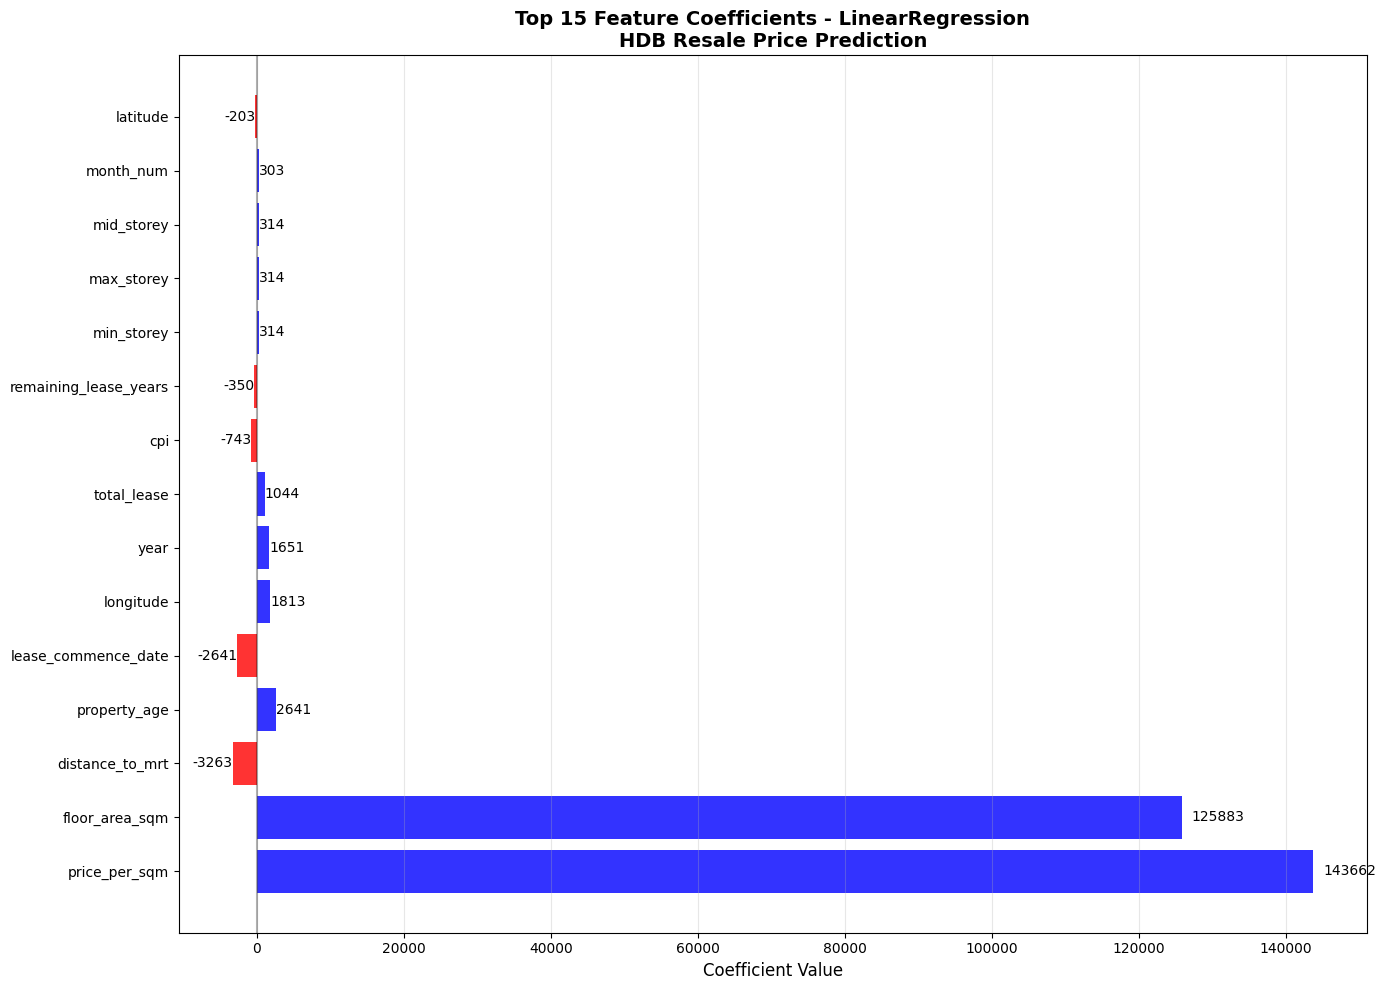

  ✅ Logged datasets as artifacts
  🎯 LinearRegression logged to MLflow run: eb844b5845594480ae45f37089c08d68 (NO WARNINGS)
  📊 Test R²: 0.9691
  📊 Test RMSE: $31,419
  📊 CV R² (5-fold): 0.9692 ± 0.0005
  ⏱️  Training time: 0.13 seconds

🔧 Training baseline Ridge...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_Ridge_1756164543'.
Created version '1' of model 'HDB_Enhanced_Ridge_1756164543'.


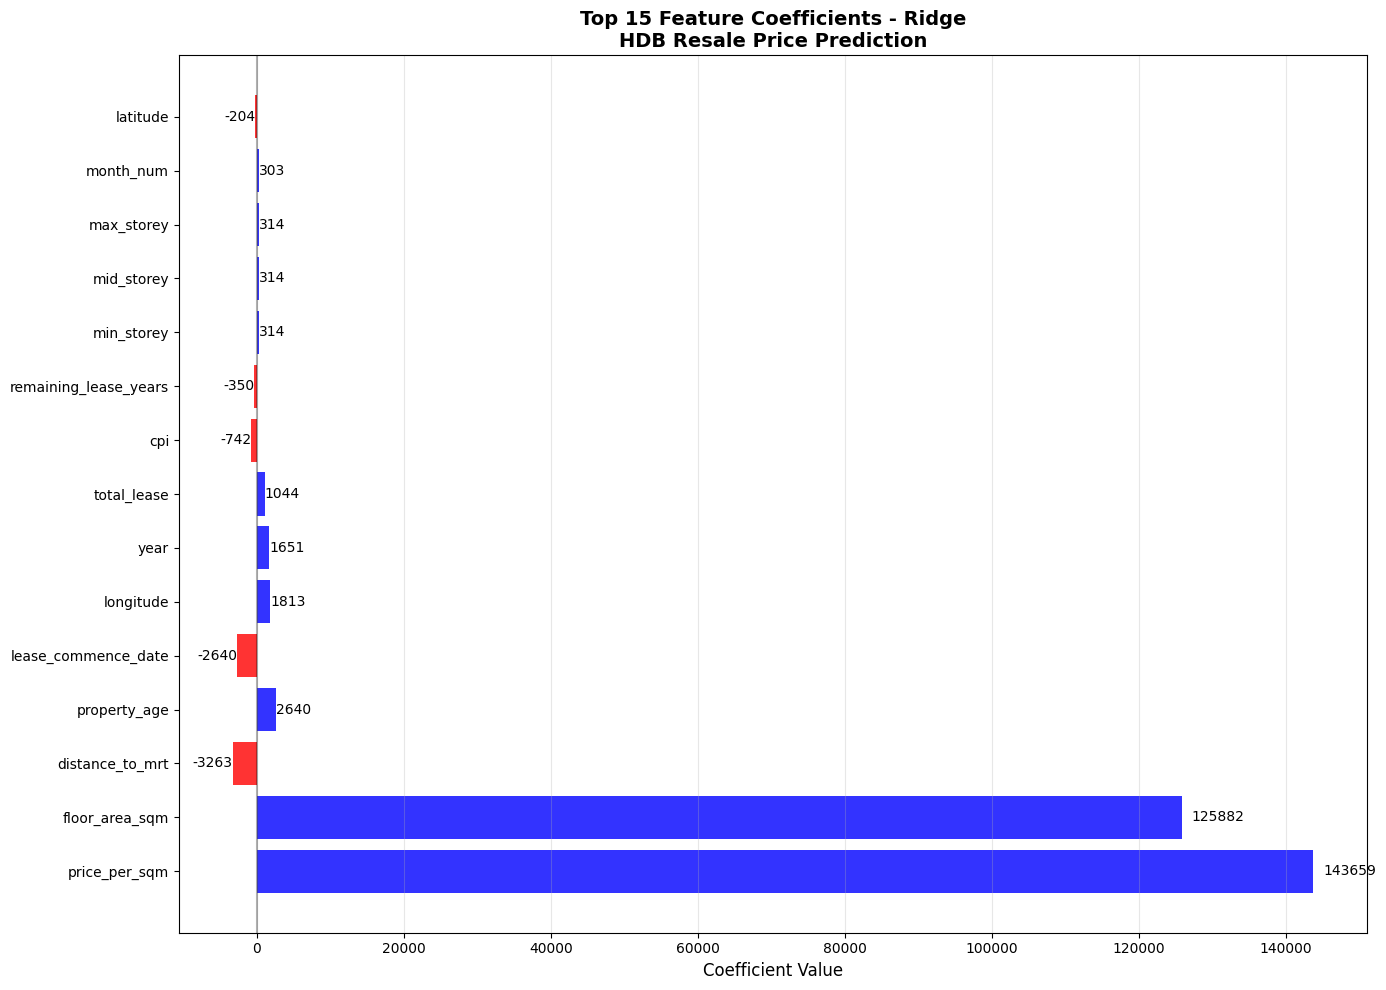

  ✅ Logged datasets as artifacts
  🎯 Ridge logged to MLflow run: 89150c77d90c4b75b5df8912d4fef2a6 (NO WARNINGS)
  📊 Test R²: 0.9691
  📊 Test RMSE: $31,419
  📊 CV R² (5-fold): 0.9692 ± 0.0005
  ⏱️  Training time: 0.02 seconds

🔧 Training baseline Lasso...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_Lasso_1756164583'.
Created version '1' of model 'HDB_Enhanced_Lasso_1756164583'.


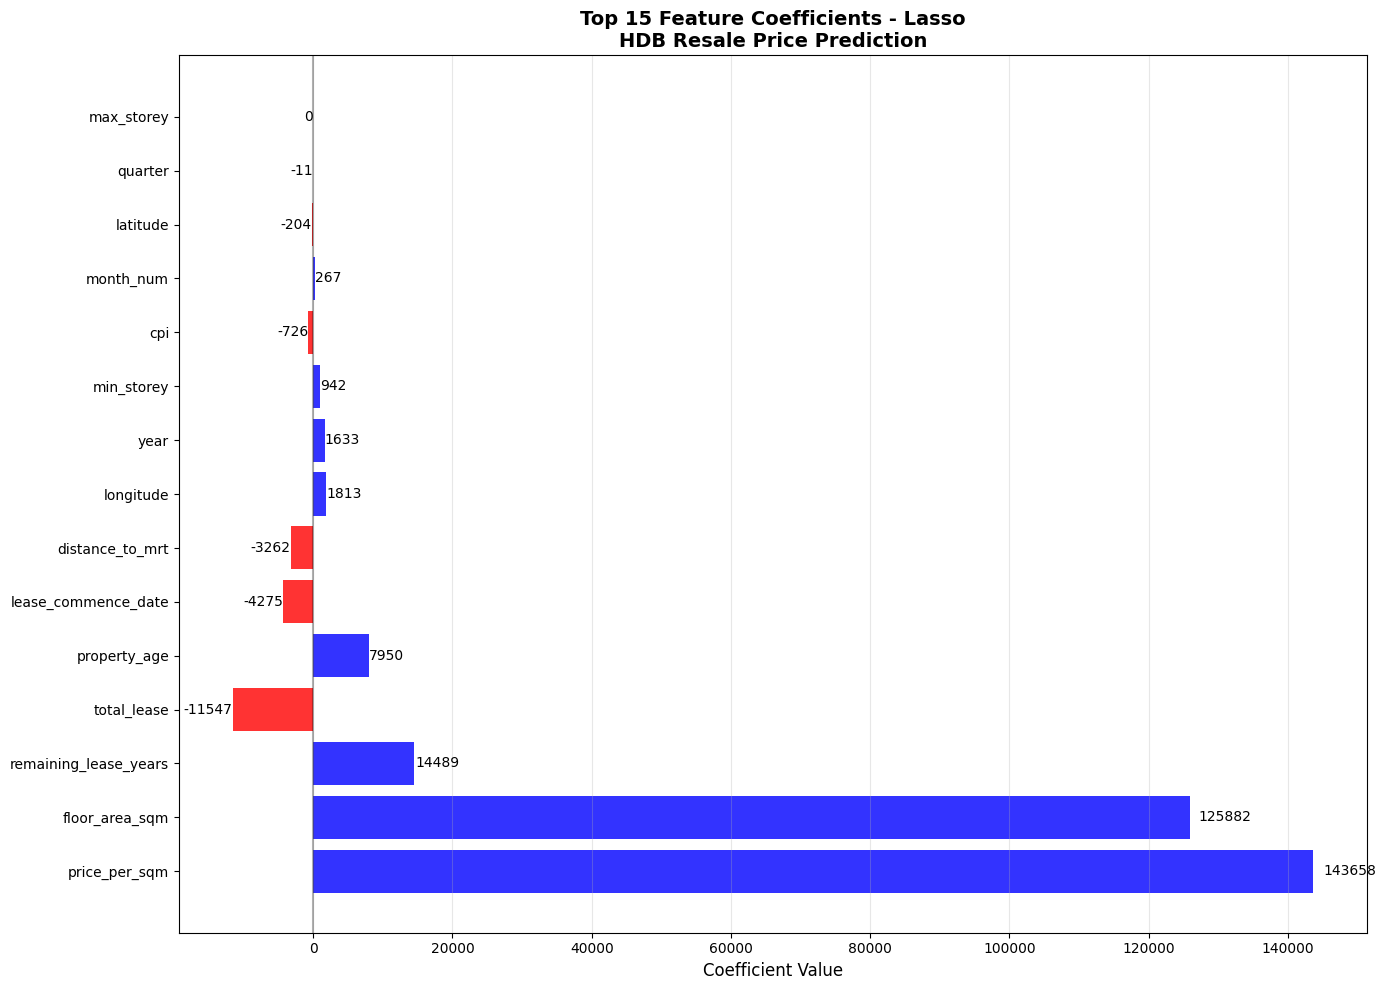

  ✅ Logged datasets as artifacts
  🎯 Lasso logged to MLflow run: 351d20247f4b403d89782aabb3931392 (NO WARNINGS)
  📊 Test R²: 0.9691
  📊 Test RMSE: $31,419
  📊 CV R² (5-fold): 0.9692 ± 0.0005
  ⏱️  Training time: 5.80 seconds

🔧 Training baseline ElasticNet...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_ElasticNet_1756164590'.
Created version '1' of model 'HDB_Enhanced_ElasticNet_1756164590'.


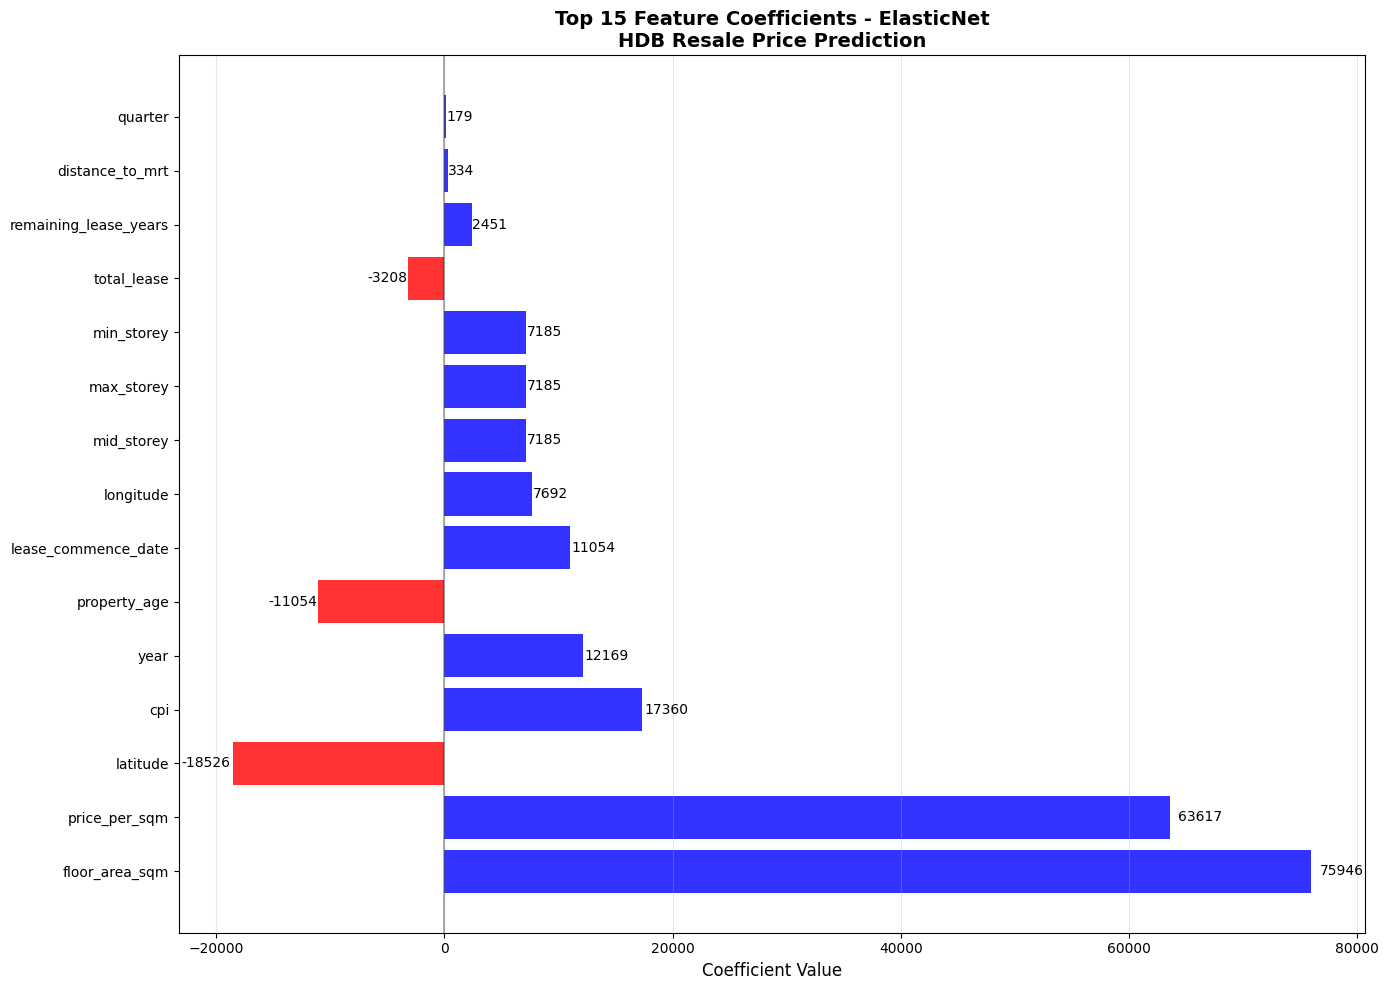

  ✅ Logged datasets as artifacts
  🎯 ElasticNet logged to MLflow run: ebc29d8a0ab64dc8b0826306a1fd3792 (NO WARNINGS)
  📊 Test R²: 0.8494
  📊 Test RMSE: $69,330
  📊 CV R² (5-fold): 0.8493 ± 0.0012
  ⏱️  Training time: 0.08 seconds

✅ Step 1 Complete: 4 baseline models trained
✅ Step 1 function ready!


In [12]:
def step1_baseline_models(X, y, feature_names, experiment_id):
    """Step 1: Train baseline linear models with default parameters"""
    print("\n🎯 STEP 1: BASELINE MODEL TRAINING")
    print("=" * 60)

    # Select only numeric columns
    X_numeric = X.select_dtypes(include=np.number)
    # Update feature names list to reflect the selected numeric columns
    feature_names_numeric = X_numeric.columns.tolist()

    print(f"📊 Original features: {len(feature_names)}")
    print(f"📊 Numeric features selected: {len(feature_names_numeric)}")
    print(f"📊 Numeric features: {feature_names_numeric}")

    # Check if there are any numeric features left
    if X_numeric.shape[1] == 0:
        print("❌ Error: No numeric features found after dropping non-numeric columns.")
        print("Please ensure your data has numerical columns for linear models.")
        return None, None, None, None, None, None, None # Added None for feature_names_numeric


    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"📊 Data split: {len(X_train):,} train, {len(X_test):,} test")
    print(f"📊 Feature scaling: StandardScaler applied")

    # Define baseline models
    baseline_models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(random_state=42),
        'Lasso': Lasso(random_state=42, max_iter=2000),
        'ElasticNet': ElasticNet(random_state=42, max_iter=2000)
    }

    baseline_results = {}

    for model_name, model in baseline_models.items():
        print(f"\n🔧 Training baseline {model_name}...")

        # Train model
        start_time = time.time()
        model.fit(X_train_scaled, y_train)
        training_time = time.time() - start_time

        # Make predictions
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        # Cross-validation score
        # Use X_train_scaled for cross_val_score as well
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()

        # Prepare parameters
        params = {
            'model_type': f'{model_name}_Baseline',
            'test_size': 0.2,
            'random_state': 42,
            'feature_scaling': 'StandardScaler',
            'n_features': len(feature_names_numeric), # Use length of numeric features
            'cv_folds': 5,
            'step': 'baseline'
        }

        # Add model-specific parameters
        if hasattr(model, 'alpha'):
            params['alpha'] = model.alpha
        if hasattr(model, 'l1_ratio'):
            params['l1_ratio'] = model.l1_ratio
        if hasattr(model, 'max_iter'):
            params['max_iter'] = model.max_iter

        # Prepare metrics
        metrics = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'cv_r2_mean': cv_mean,
            'cv_r2_std': cv_std,
            'overfitting_score': abs(train_r2 - test_r2),
            'training_time_seconds': training_time,
            'mape': np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
        }

        # Log to MLflow
        run_id = log_model_enhanced_professional(
            model=model,
            model_name=model_name,
            params=params,
            metrics=metrics,
            X_train_sample=X_train_scaled,
            y_train_sample=y_train,
            feature_names=feature_names_numeric, # Use numeric feature names for logging
            experiment_id=experiment_id,
            run_name_prefix="Baseline"
        )

        baseline_results[model_name] = {
            'model': model,
            'metrics': metrics,
            'run_id': run_id,
            'test_r2': test_r2,
            'test_rmse': test_rmse
        }

        print(f"  📊 Test R²: {test_r2:.4f}")
        print(f"  📊 Test RMSE: ${test_rmse:,.0f}")
        print(f"  📊 CV R² (5-fold): {cv_mean:.4f} ± {cv_std:.4f}")
        print(f"  ⏱️  Training time: {training_time:.2f} seconds")

    print(f"\n✅ Step 1 Complete: {len(baseline_results)} baseline models trained")
    return baseline_results, X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names_numeric # Added feature_names_numeric

# Note: Run this after loading your data
baseline_results, X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names_numeric = step1_baseline_models(
     X, y, feature_columns, experiments['baseline']
 )

print("✅ Step 1 function ready!")

## 8. Step 2: Comprehensive Hyperparameter Tuning



```python
# This is formatted as code
def step2_hyperparameter_tuning(X_train_scaled, X_test_scaled, y_train, y_test,
                               feature_names_numeric, experiment_id, baseline_results): # Changed feature_names to feature_names_numeric
    """Step 2: Comprehensive hyperparameter tuning with multiple methods"""
    print("\n🎯 STEP 2: COMPREHENSIVE HYPERPARAMETER TUNING")
    print("=" * 70)

    # Define comprehensive parameter grids
    param_grids = {
        'Ridge': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
        },
        'Lasso': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
            'max_iter': [1000, 2000, 3000],
            'tol': [1e-4, 1e-3, 1e-2]
        },
        'ElasticNet': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
            'max_iter': [1000, 2000, 3000]
        }
    }

    # Define tuning methods
    tuning_methods = {
        'GridSearchCV': GridSearchCV,
        'RandomizedSearchCV': RandomizedSearchCV
    }

    tuning_results = {}

    for model_name in ['Ridge', 'Lasso', 'ElasticNet']:
        print(f"\n🔄 Tuning {model_name} with multiple methods...")

        # Get base model
        if model_name == 'Ridge':
            base_model = Ridge(random_state=42)
        elif model_name == 'Lasso':
            base_model = Lasso(random_state=42)
        elif model_name == 'ElasticNet':
            base_model = ElasticNet(random_state=42)

        best_method_result = None
        best_score = -np.inf

        # Try both tuning methods
        for method_name, method_class in tuning_methods.items():
            print(f"  📊 Using {method_name}...")

            start_time = time.time()

            # Configure search method
            if method_name == 'GridSearchCV':
                search = method_class(
                    base_model,
                    param_grids[model_name],
                    cv=5,
                    scoring='r2',
                    n_jobs=-1,
                    verbose=0
                )
            else:  # RandomizedSearchCV
                search = method_class(
                    base_model,
                    param_grids[model_name],
                    n_iter=50,  # Limit iterations for efficiency
                    cv=5,
                    scoring='r2',
                    n_jobs=-1,
                    random_state=42,
                    verbose=0
                )

            # Fit the search
            search.fit(X_train_scaled, y_train)
            tuning_time = time.time() - start_time

            # Check if this is the best method so far
            if search.best_score_ > best_score:
                best_score = search.best_score_
                best_method_result = {
                    'method': method_name,
                    'search': search,
                    'tuning_time': tuning_time
                }

            print(f"    ✓ {method_name}: Best CV R² = {search.best_score_:.4f} (Time: {tuning_time:.1f}s)")

        # Use the best method's result
        best_search = best_method_result['search']
        best_model = best_search.best_estimator_
        best_method = best_method_result['method']
        total_tuning_time = best_method_result['tuning_time']

        # Make predictions with best model
        y_train_pred = best_model.predict(X_train_scaled)
        y_test_pred = best_model.predict(X_test_scaled)

        # Calculate metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        # Calculate improvement vs baseline
        baseline_r2 = baseline_results[model_name]['test_r2']
        improvement_r2 = test_r2 - baseline_r2
        improvement_pct = (improvement_r2 / baseline_r2) * 100

        # Prepare parameters
        params = {
            'model_type': f'{model_name}_Tuned',
            'tuning_method': best_method,
            'cv_folds': 5,
            'tuning_time_seconds': round(total_tuning_time, 2),
            'baseline_r2': baseline_r2,
            'improvement_r2': improvement_r2,
            'improvement_percentage': improvement_pct,
            'step': 'hyperparameter_tuning'
        }

        # Add best parameters
        for param, value in best_search.best_params_.items():
            params[f'best_{param}'] = value

        # Prepare metrics
        metrics = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'cv_best_score': best_search.best_score_,
            'overfitting_score': abs(train_r2 - test_r2),
            'tuning_time': total_tuning_time,
            'improvement_r2': improvement_r2,
            'improvement_percentage': improvement_pct,
            'mape': np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
        }

        # Log to MLflow
        run_id = log_model_enhanced_professional(
            model=best_model,
            model_name=f'{model_name}_Tuned',
            params=params,
            metrics=metrics,
            X_train_sample=X_train_scaled,
            y_train_sample=y_train,
            feature_names=feature_names_numeric, # Use numeric feature names for logging
            experiment_id=experiment_id,
            run_name_prefix="Tuned"
        )

        tuning_results[model_name] = {
            'model': best_model,
            'best_params': best_search.best_params_,
            'best_method': best_method,
            'metrics': metrics,
            'run_id': run_id,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'improvement_r2': improvement_r2,
            'improvement_pct': improvement_pct
        }

        print(f"  🏆 Best {model_name}: R² = {test_r2:.4f} (↑{improvement_r2:+.4f}, {improvement_pct:+.2f}%)")
        print(f"    Method: {best_method} | Params: {best_search.best_params_}")

    print(f"\n✅ Step 2 Complete: {len(tuning_results)} models optimized")
    return tuning_results

# Note: Run this after Step 1
tuning_results = step2_hyperparameter_tuning(
     X_train_scaled, X_test_scaled, y_train, y_test, feature_names_numeric, # Added feature_names_numeric
     experiments['tuning'], baseline_results
 )

print("✅ Step 2 function ready!")
```



My record!

---
*   List item
*   n_iter=50, cv=5,
*   n_iter=30, cv=3,
*   n_iter=25, cv=3




🎯 STEP 2: RANDOMIZED HYPERPARAMETER TUNING

🔄 Tuning Ridge with RandomizedSearchCV...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_Ridge_Tuned_1756164600'.
Created version '1' of model 'HDB_Enhanced_Ridge_Tuned_1756164600'.


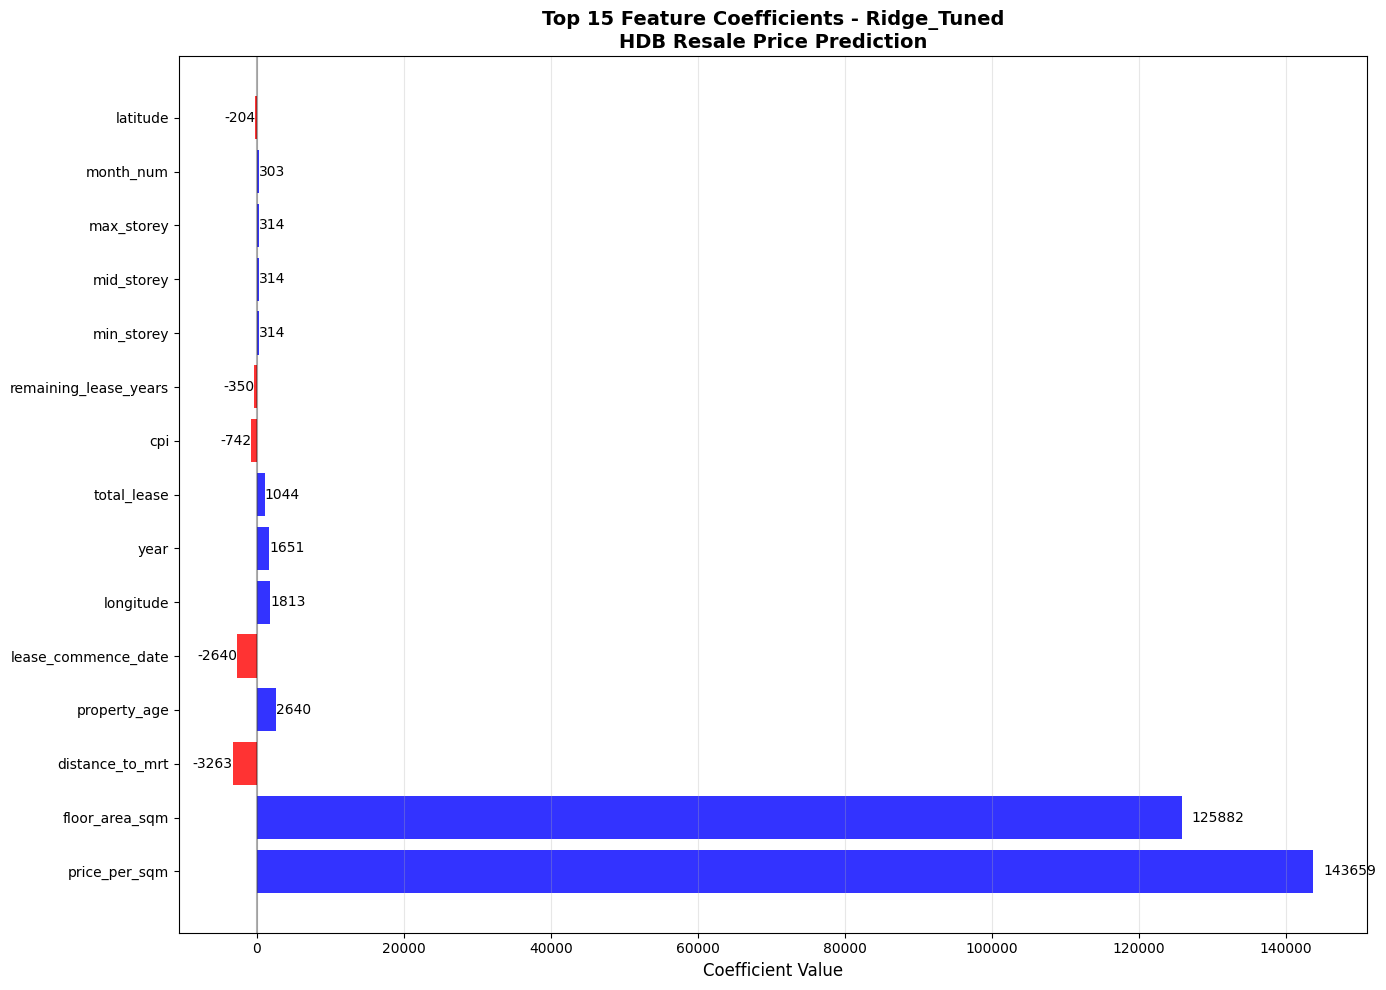

  ✅ Logged datasets as artifacts
  🎯 Ridge_Tuned logged to MLflow run: bb4d017aae324429b96ddb36d9cead01 (NO WARNINGS)
  🏆 Best Ridge: R² = 0.9691 (↑+0.0000, +0.00%)
    Params: {'solver': 'auto', 'alpha': 1.0} | Tuning time: 2.7s

🔄 Tuning Lasso with RandomizedSearchCV...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_Lasso_Tuned_1756164796'.
Created version '1' of model 'HDB_Enhanced_Lasso_Tuned_1756164796'.


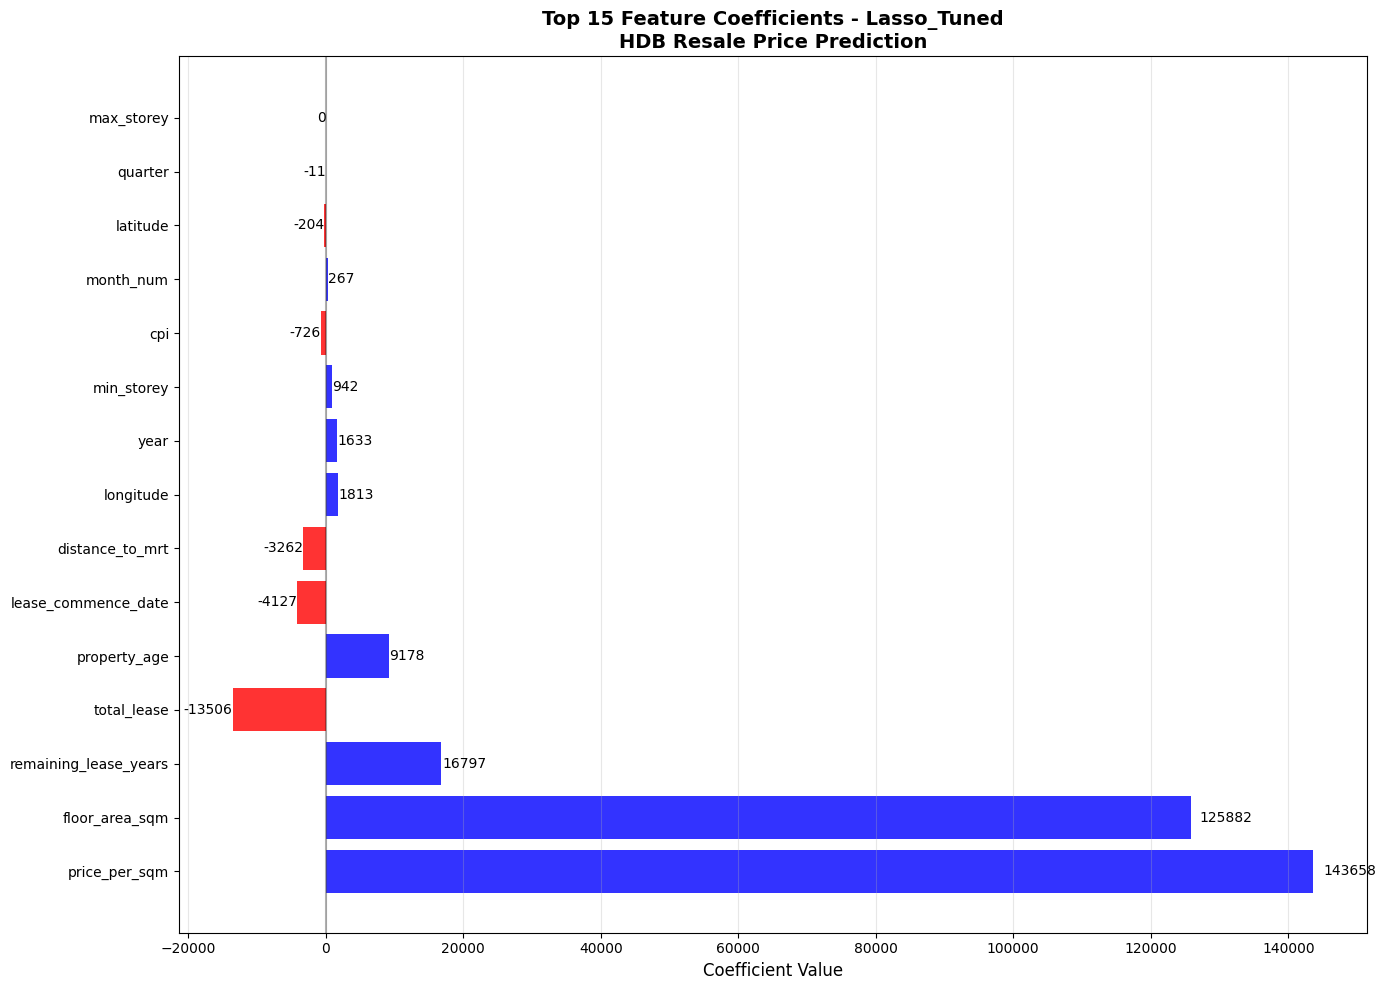

  ✅ Logged datasets as artifacts
  🎯 Lasso_Tuned logged to MLflow run: c7a2552c5628452a83e5d552caf62158 (NO WARNINGS)
  🏆 Best Lasso: R² = 0.9691 (↑+0.0000, +0.00%)
    Params: {'tol': 0.0001, 'max_iter': 1000, 'alpha': 1.0} | Tuning time: 189.5s

🔄 Tuning ElasticNet with RandomizedSearchCV...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_ElasticNet_Tuned_1756164915'.
Created version '1' of model 'HDB_Enhanced_ElasticNet_Tuned_1756164915'.


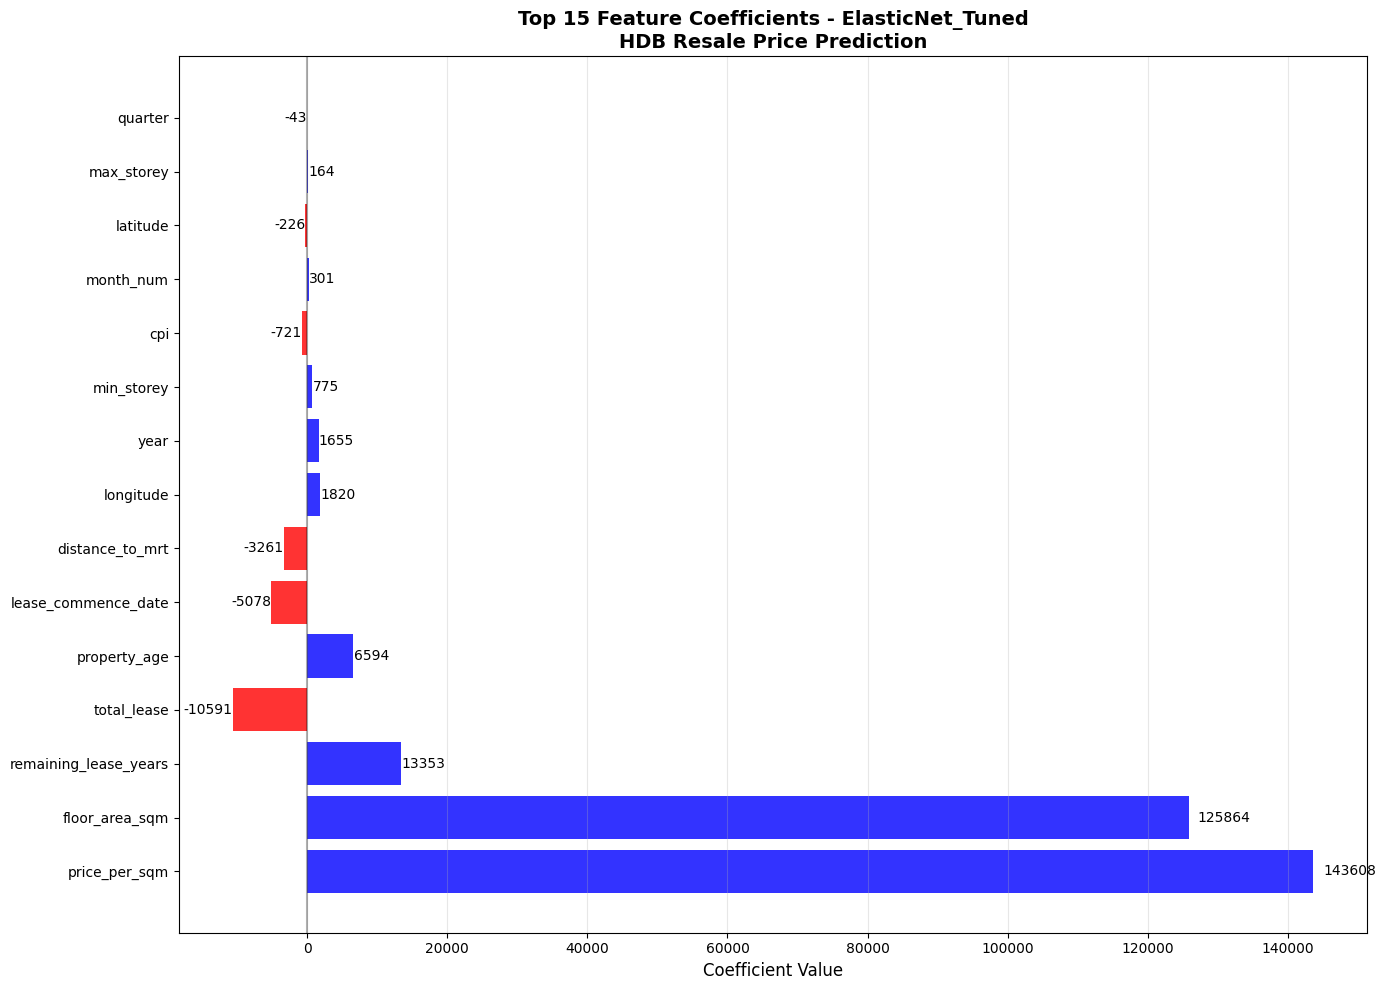

  ✅ Logged datasets as artifacts
  🎯 ElasticNet_Tuned logged to MLflow run: 68d5b61e77804e4694a70bcc5023380d (NO WARNINGS)
  🏆 Best ElasticNet: R² = 0.9691 (↑+0.1197, +14.09%)
    Params: {'max_iter': 2000, 'l1_ratio': 0.9, 'alpha': 0.001} | Tuning time: 110.2s

✅ Step 2 Complete: 3 models optimized with RandomizedSearchCV


In [13]:
from sklearn.model_selection import RandomizedSearchCV

def step2_randomized_tuning(
    X_train_scaled, X_test_scaled, y_train, y_test,
    feature_names_numeric, experiment_id, baseline_results,
    n_iter=25, cv=3, random_state=42
):
    """Step 2: Hyperparameter tuning using RandomizedSearchCV only."""
    print("\n🎯 STEP 2: RANDOMIZED HYPERPARAMETER TUNING")
    print("=" * 70)

    # Define parameter distributions (smaller lists = faster search)
    param_distributions = {
        'Ridge': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr']
        },
        'Lasso': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
            'max_iter': [1000, 2000],
            'tol': [1e-4, 1e-3]
        },
        'ElasticNet': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
            'l1_ratio': [0.1, 0.5, 0.9],
            'max_iter': [1000, 2000]
        }
    }

    tuning_results = {}

    for model_name in ['Ridge', 'Lasso', 'ElasticNet']:
        print(f"\n🔄 Tuning {model_name} with RandomizedSearchCV...")

        # Base model
        if model_name == 'Ridge':
            base_model = Ridge(random_state=random_state)
        elif model_name == 'Lasso':
            base_model = Lasso(random_state=random_state)
        else:
            base_model = ElasticNet(random_state=random_state)

        search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_distributions[model_name],
            n_iter=n_iter,
            cv=cv,
            scoring='r2',
            n_jobs=-1,
            random_state=random_state,
            verbose=0
        )

        start_time = time.time()
        search.fit(X_train_scaled, y_train)
        tuning_time = time.time() - start_time

        best_model = search.best_estimator_
        y_train_pred = best_model.predict(X_train_scaled)
        y_test_pred = best_model.predict(X_test_scaled)

        # Metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2  = r2_score(y_test,  y_test_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae  = mean_absolute_error(y_test,  y_test_pred)
        baseline_r2 = baseline_results[model_name]['test_r2']
        improvement_r2  = test_r2 - baseline_r2
        improvement_pct = (improvement_r2 / baseline_r2) * 100

        # Params and metrics for MLflow logging
        params = {
            'model_type': f'{model_name}_Tuned',
            'tuning_method': 'RandomizedSearchCV',
            'cv_folds': cv,
            'tuning_time_seconds': round(tuning_time, 2),
            'baseline_r2': baseline_r2,
            'improvement_r2': improvement_r2,
            'improvement_percentage': improvement_pct,
            'step': 'hyperparameter_tuning'
        }
        for param, value in search.best_params_.items():
            params[f'best_{param}'] = value

        metrics = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'cv_best_score': search.best_score_,
            'overfitting_score': abs(train_r2 - test_r2),
            'tuning_time': tuning_time,
            'improvement_r2': improvement_r2,
            'improvement_percentage': improvement_pct,
            'mape': np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
        }

        # Log model
        run_id = log_model_enhanced_professional(
            model=best_model,
            model_name=f'{model_name}_Tuned',
            params=params,
            metrics=metrics,
            X_train_sample=X_train_scaled,
            y_train_sample=y_train,
            feature_names=feature_names_numeric,
            experiment_id=experiment_id,
            run_name_prefix="Tuned"
        )

        tuning_results[model_name] = {
            'model': best_model,
            'best_params': search.best_params_,
            'best_method': 'RandomizedSearchCV',
            'metrics': metrics,
            'run_id': run_id,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'improvement_r2': improvement_r2,
            'improvement_pct': improvement_pct
        }

        print(f"  🏆 Best {model_name}: R² = {test_r2:.4f} (↑{improvement_r2:+.4f}, {improvement_pct:+.2f}%)")
        print(f"    Params: {search.best_params_} | Tuning time: {tuning_time:.1f}s")

    print(f"\n✅ Step 2 Complete: {len(tuning_results)} models optimized with RandomizedSearchCV")
    return tuning_results

# Use this instead of the original step2
tuning_results = step2_randomized_tuning(
    X_train_scaled, X_test_scaled, y_train, y_test,
    feature_names_numeric, experiments['tuning'], baseline_results,
    n_iter=25,  # adjust lower for faster search
    cv=3        # fewer folds speeds things up
)


In [14]:
def step2_hyperparameter_tuning(*args, **kwargs):
    return step2_randomized_tuning(*args, **kwargs)


## 9. Step 3: Model Comparison & Selection


🎯 STEP 3: MODEL COMPARISON & SELECTION
🏆 BEST OVERALL MODEL: LinearRegression_Baseline
   📈 R² Score: 0.9691
   💰 RMSE: $31,419
   🔧 Type: baseline
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_FINAL_LinearRegression_Baseline_1756164923'.
Created version '1' of model 'HDB_Enhanced_FINAL_LinearRegression_Baseline_1756164923'.


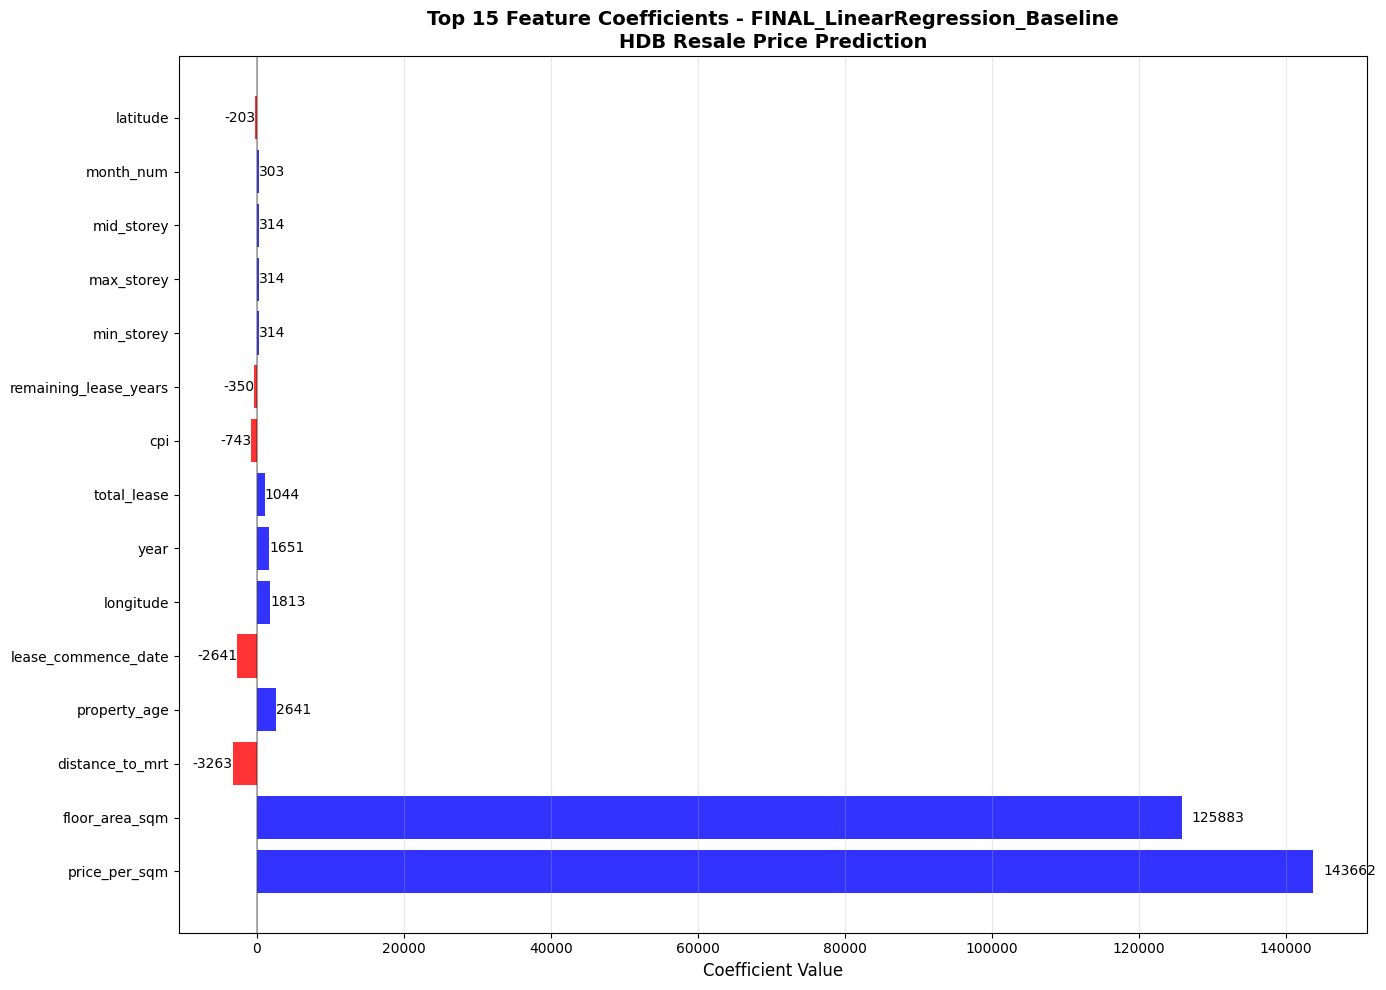

  ✅ Logged datasets as artifacts
  🎯 FINAL_LinearRegression_Baseline logged to MLflow run: d033fea3094a4ffb8045cdd8814b2453 (NO WARNINGS)


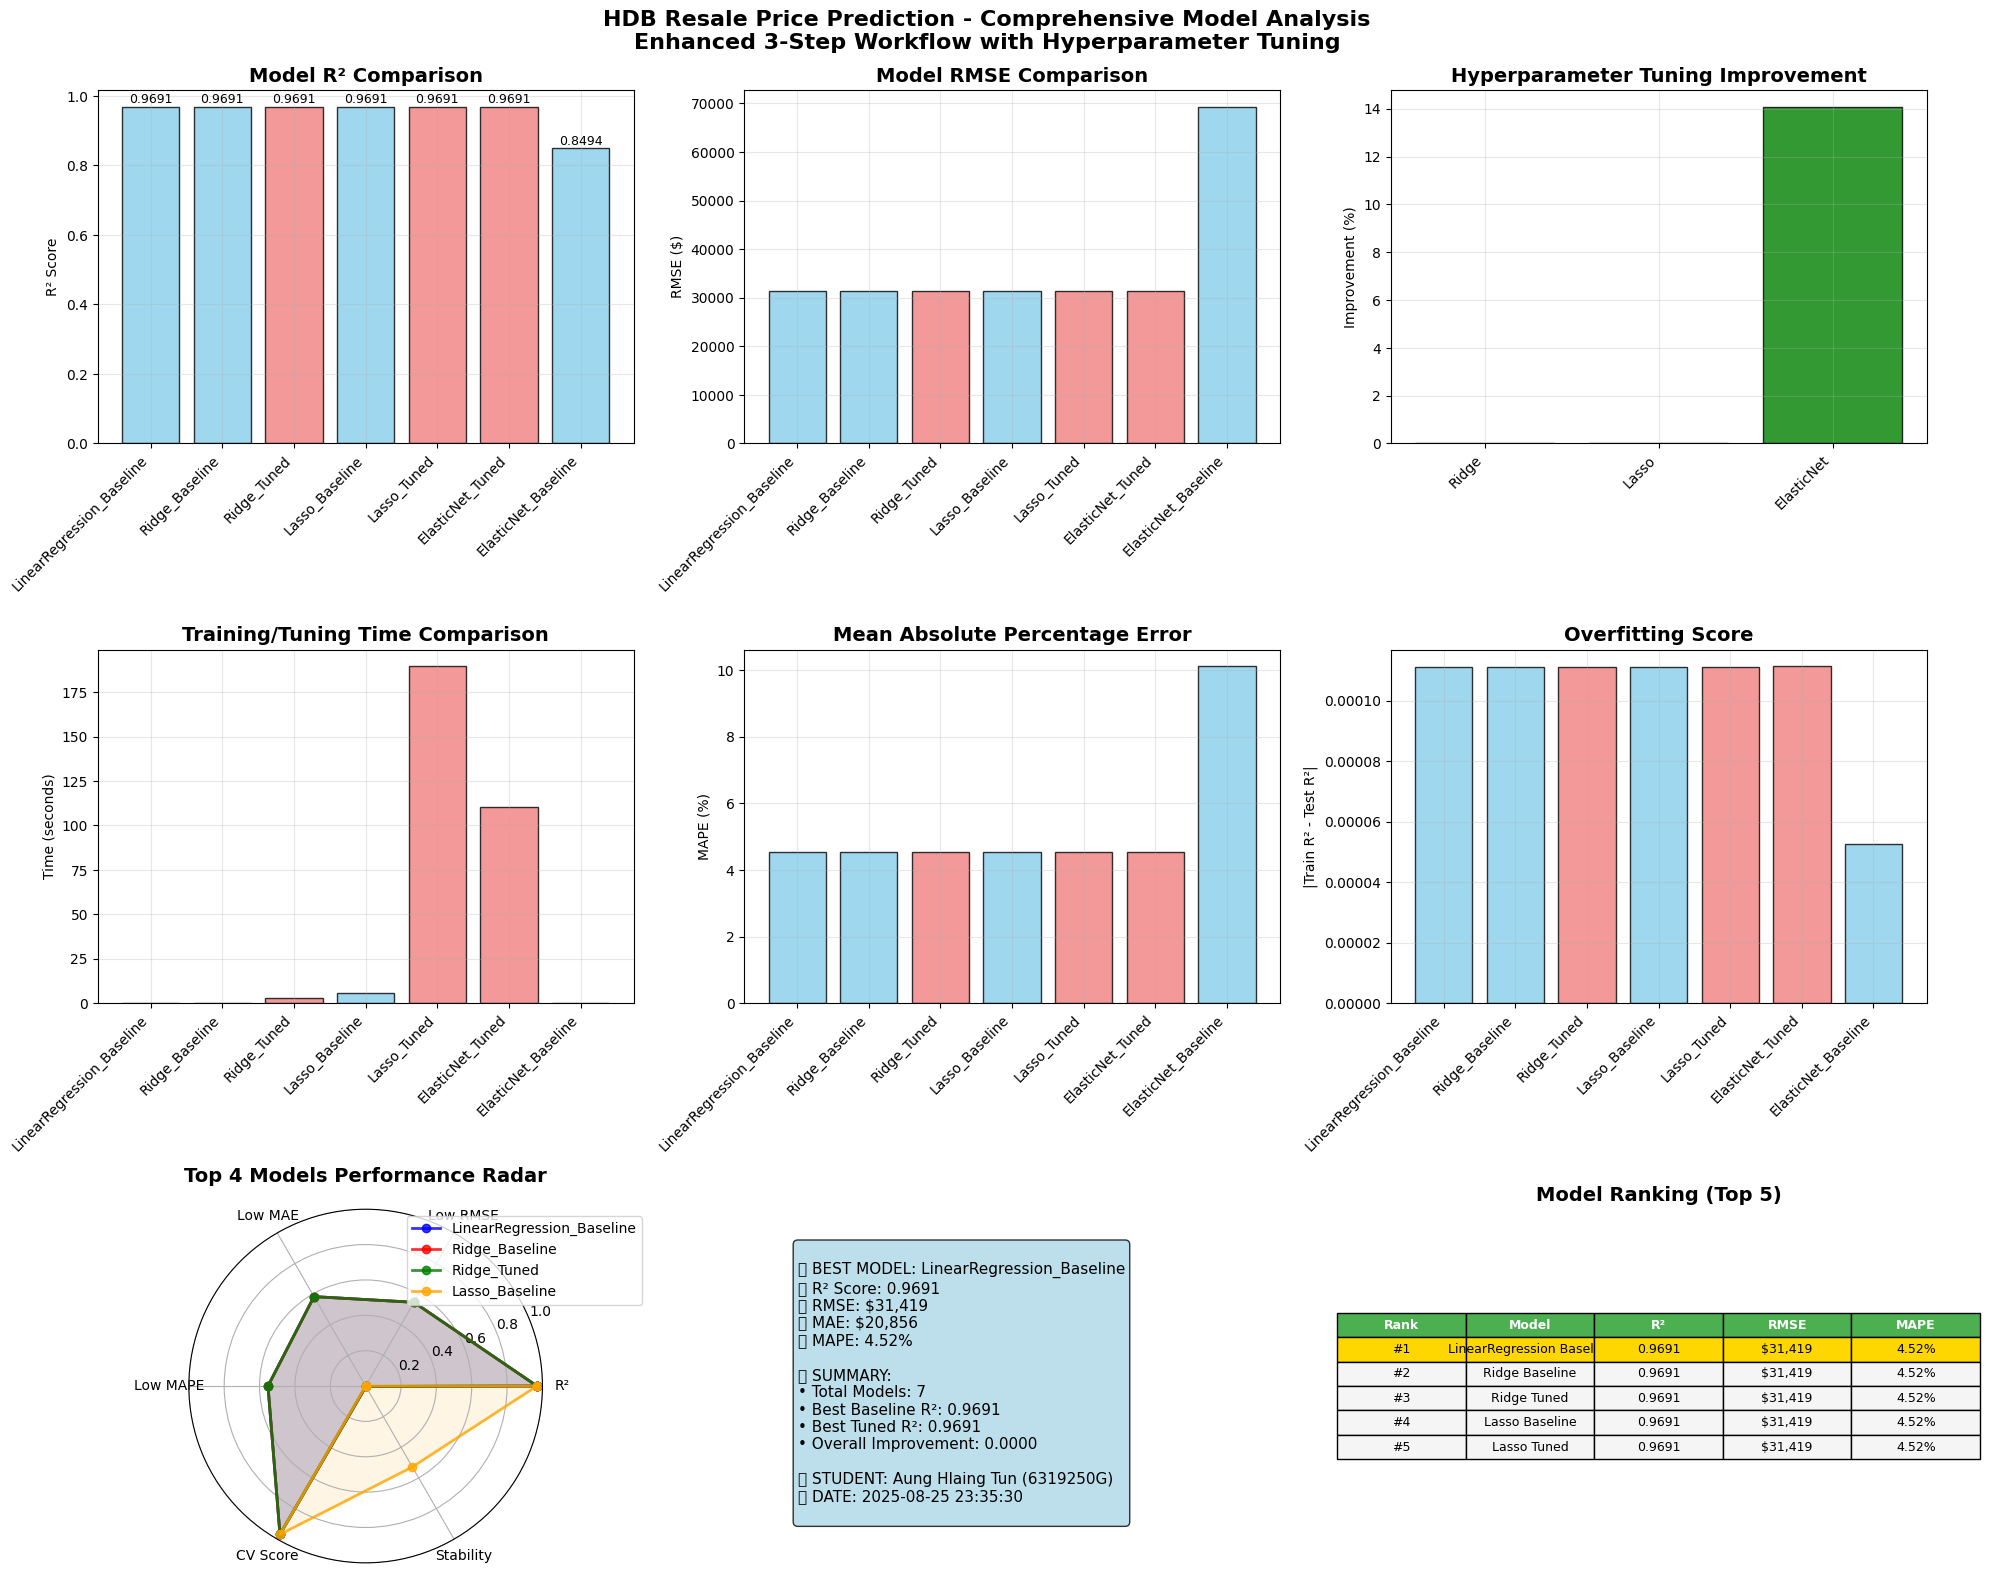


📊 FINAL RESULTS:
   🏆 Best Model: LinearRegression_Baseline
   📈 Final R²: 0.9691
   💰 Final RMSE: $31,419
   📊 Final MAPE: 4.52%
   🔢 Total Models Tested: 7
   📈 Overall Improvement: 0.0000

✅ Step 3 Complete: Comprehensive analysis finished!
✅ Step 3 function ready!


In [15]:
def step3_model_comparison(baseline_results, tuning_results, X_train_scaled, X_test_scaled,
                          y_train, y_test, feature_names_numeric, experiment_id):
    """Step 3: Comprehensive model comparison and final selection"""
    print("\n🎯 STEP 3: MODEL COMPARISON & SELECTION")
    print("=" * 60)

    # Combine all results
    all_results = {}

    # Add baseline results
    for name, result in baseline_results.items():
        all_results[f"{name}_Baseline"] = {
            'model': result['model'],
            'test_r2': result['test_r2'],
            'test_rmse': result['test_rmse'],
            'type': 'baseline',
            'run_id': result['run_id'],
            'metrics': result['metrics']
        }

    # Add tuning results
    for name, result in tuning_results.items():
        all_results[f"{name}_Tuned"] = {
            'model': result['model'],
            'test_r2': result['test_r2'],
            'test_rmse': result['test_rmse'],
            'type': 'tuned',
            'run_id': result['run_id'],
            'metrics': result['metrics'],
            'improvement_r2': result['improvement_r2'],
            'improvement_pct': result['improvement_pct'],
            'best_method': result['best_method']
        }

    # Find best model overall
    best_model_name = max(all_results.keys(), key=lambda x: all_results[x]['test_r2'])
    best_model_info = all_results[best_model_name]
    best_model = best_model_info['model']

    print(f"🏆 BEST OVERALL MODEL: {best_model_name}")
    print(f"   📈 R² Score: {best_model_info['test_r2']:.4f}")
    print(f"   💰 RMSE: ${best_model_info['test_rmse']:,.0f}")
    print(f"   🔧 Type: {best_model_info['type']}")

    # Create comprehensive comparison DataFrame
    comparison_data = []
    for name, info in all_results.items():
        comparison_data.append({
            'Model': name,
            'Type': info['type'],
            'R2_Score': info['test_r2'],
            'RMSE': info['test_rmse'],
            'MAE': info['metrics'].get('test_mae', 0),
            'MAPE': info['metrics'].get('mape', 0),
            'CV_Score': info['metrics'].get('cv_r2_mean', info['metrics'].get('cv_best_score', 0)),
            'Overfitting': info['metrics'].get('overfitting_score', 0),
            'Training_Time': info['metrics'].get('training_time_seconds', info['metrics'].get('tuning_time', 0)),
            'R2_Improvement': info.get('improvement_r2', 0),
            'Improvement_Pct': info.get('improvement_pct', 0),
            'Method': info.get('best_method', 'Default'),
            'Run_ID': info['run_id']
        })

    comparison_df = pd.DataFrame(comparison_data).sort_values('R2_Score', ascending=False)

    # Final evaluation with best model
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Calculate comprehensive final metrics
    final_metrics = {
        'final_train_r2': r2_score(y_train, y_train_pred),
        'final_test_r2': r2_score(y_test, y_test_pred),
        'final_train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'final_test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'final_train_mae': mean_absolute_error(y_train, y_train_pred),
        'final_test_mae': mean_absolute_error(y_test, y_test_pred),
        'final_mape': np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100,
        'total_models_tested': len(all_results),
        'best_baseline_r2': max([info['test_r2'] for name, info in all_results.items() if info['type'] == 'baseline']),
        'best_tuned_r2': max([info['test_r2'] for name, info in all_results.items() if info['type'] == 'tuned']),
        'overall_improvement': best_model_info['test_r2'] - max([info['test_r2'] for name, info in all_results.items() if info['type'] == 'baseline'])
    }

    # Parameters for final model
    final_params = {
        'best_model_name': best_model_name,
        'best_model_type': best_model_info['type'],
        'total_models_evaluated': len(all_results),
        'analysis_timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'step': 'final_comparison'
    }

    # Add best model parameters
    if hasattr(best_model, 'get_params'):
        for param, value in best_model.get_params().items():
            final_params[f'best_model_{param}'] = value

    # Log final comparison to MLflow
    run_id = log_model_enhanced_professional(
        model=best_model,
        model_name=f'FINAL_{best_model_name}',
        params=final_params,
        metrics=final_metrics,
        X_train_sample=X_train_scaled,
        y_train_sample=y_train,
        feature_names=feature_names_numeric, # Use numeric feature names for logging
        experiment_id=experiment_id,
        run_name_prefix="Final"
    )

    # Create comprehensive comparison visualization
    with mlflow.start_run(experiment_id=experiment_id, run_name="Model_Comparison_Dashboard") as dashboard_run:
        # Save comparison data
        comparison_df.to_csv("model_comparison_comprehensive.csv", index=False)
        mlflow.log_artifact("model_comparison_comprehensive.csv")

        # Create comprehensive comparison plots
        fig = plt.figure(figsize=(20, 16))

        # Plot 1: R² comparison
        ax1 = plt.subplot(3, 3, 1)
        colors = ['skyblue' if 'Baseline' in model else 'lightcoral' for model in comparison_df['Model']]
        bars1 = ax1.bar(range(len(comparison_df)), comparison_df['R2_Score'], color=colors, alpha=0.8, edgecolor='black')
        ax1.set_title('Model R² Comparison', fontsize=14, fontweight='bold')
        ax1.set_ylabel('R² Score')
        ax1.set_xticks(range(len(comparison_df)))
        ax1.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
        ax1.grid(True, alpha=0.3)

        # Add value labels
        for i, bar in enumerate(bars1):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=9)

        # Plot 2: RMSE comparison
        ax2 = plt.subplot(3, 3, 2)
        bars2 = ax2.bar(range(len(comparison_df)), comparison_df['RMSE'], color=colors, alpha=0.8, edgecolor='black')
        ax2.set_title('Model RMSE Comparison', fontsize=14, fontweight='bold')
        ax2.set_ylabel('RMSE ($)')
        ax2.set_xticks(range(len(comparison_df)))
        ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
        ax2.grid(True, alpha=0.3)

        # Plot 3: Improvement analysis
        ax3 = plt.subplot(3, 3, 3)
        tuned_models = comparison_df[comparison_df['Type'] == 'tuned']
        if len(tuned_models) > 0:
            bars3 = ax3.bar(range(len(tuned_models)), tuned_models['Improvement_Pct'],
                           color='green', alpha=0.8, edgecolor='black')
            ax3.set_title('Hyperparameter Tuning Improvement', fontsize=14, fontweight='bold')
            ax3.set_ylabel('Improvement (%)')
            ax3.set_xticks(range(len(tuned_models)))
            ax3.set_xticklabels([name.replace('_Tuned', '') for name in tuned_models['Model']], rotation=45, ha='right')
            ax3.grid(True, alpha=0.3)

        # Plot 4: Training time comparison
        ax4 = plt.subplot(3, 3, 4)
        bars4 = ax4.bar(range(len(comparison_df)), comparison_df['Training_Time'], color=colors, alpha=0.8, edgecolor='black')
        ax4.set_title('Training/Tuning Time Comparison', fontsize=14, fontweight='bold')
        ax4.set_ylabel('Time (seconds)')
        ax4.set_xticks(range(len(comparison_df)))
        ax4.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
        ax4.grid(True, alpha=0.3)

        # Plot 5: MAPE comparison
        ax5 = plt.subplot(3, 3, 5)
        bars5 = ax5.bar(range(len(comparison_df)), comparison_df['MAPE'], color=colors, alpha=0.8, edgecolor='black')
        ax5.set_title('Mean Absolute Percentage Error', fontsize=14, fontweight='bold')
        ax5.set_ylabel('MAPE (%)')
        ax5.set_xticks(range(len(comparison_df)))
        ax5.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
        ax5.grid(True, alpha=0.3)

        # Plot 6: Overfitting analysis
        ax6 = plt.subplot(3, 3, 6)
        bars6 = ax6.bar(range(len(comparison_df)), comparison_df['Overfitting'], color=colors, alpha=0.8, edgecolor='black')
        ax6.set_title('Overfitting Score', fontsize=14, fontweight='bold')
        ax6.set_ylabel('|Train R² - Test R²|')
        ax6.set_xticks(range(len(comparison_df)))
        ax6.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
        ax6.grid(True, alpha=0.3)

        # Plot 7: Model performance radar chart
        ax7 = plt.subplot(3, 3, 7, projection='polar')

        # Normalize metrics for radar chart (higher is better)
        metrics_for_radar = {
            'R²': comparison_df['R2_Score'].values,
            'Low RMSE': 1 - (comparison_df['RMSE'] / comparison_df['RMSE'].max()),
            'Low MAE': 1 - (comparison_df['MAE'] / comparison_df['MAE'].max()),
            'Low MAPE': 1 - (comparison_df['MAPE'] / comparison_df['MAPE'].max()),
            'CV Score': comparison_df['CV_Score'].values,
            'Stability': 1 - (comparison_df['Overfitting'] / comparison_df['Overfitting'].max())
        }

        angles = np.linspace(0, 2 * np.pi, len(metrics_for_radar), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))

        # Plot top 4 models
        colors_radar = ['blue', 'red', 'green', 'orange']
        for i in range(min(4, len(comparison_df))):
            model_name = comparison_df.iloc[i]['Model']
            values = [metrics_for_radar[metric][i] for metric in metrics_for_radar.keys()]
            values += [values[0]]
            ax7.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors_radar[i], alpha=0.8)
            ax7.fill(angles, values, alpha=0.1, color=colors_radar[i])

        ax7.set_xticks(angles[:-1])
        ax7.set_xticklabels(metrics_for_radar.keys())
        ax7.set_ylim(0, 1)
        ax7.set_title('Top 4 Models Performance Radar', fontsize=14, fontweight='bold', pad=20)
        ax7.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

        # Plot 8: Summary statistics
        ax8 = plt.subplot(3, 3, 8)
        ax8.axis('off')

        summary_text = f"""
🏆 BEST MODEL: {best_model_name}
📈 R² Score: {final_metrics['final_test_r2']:.4f}
💰 RMSE: ${final_metrics['final_test_rmse']:,.0f}
📊 MAE: ${final_metrics['final_test_mae']:,.0f}
📉 MAPE: {final_metrics['final_mape']:.2f}%

📊 SUMMARY:
• Total Models: {final_metrics['total_models_tested']}
• Best Baseline R²: {final_metrics['best_baseline_r2']:.4f}
• Best Tuned R²: {final_metrics['best_tuned_r2']:.4f}
• Overall Improvement: {final_metrics['overall_improvement']:.4f}

🎯 STUDENT: Aung Hlaing Tun (6319250G)
📅 DATE: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        """

        ax8.text(0.1, 0.9, summary_text, transform=ax8.transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

        # Plot 9: Model ranking table
        ax9 = plt.subplot(3, 3, 9)
        ax9.axis('tight')
        ax9.axis('off')

        # Create ranking table
        ranking_data = []
        for i, (_, row) in enumerate(comparison_df.head(5).iterrows()):
            ranking_data.append([
                f"#{i+1}",
                row['Model'].replace('_', ' '),
                f"{row['R2_Score']:.4f}",
                f"${row['RMSE']:,.0f}",
                f"{row['MAPE']:.2f}%"
            ])

        table = ax9.table(cellText=ranking_data,
                         colLabels=['Rank', 'Model', 'R²', 'RMSE', 'MAPE'],
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1.2, 1.5)

        # Style the table
        for i in range(len(ranking_data) + 1):
            for j in range(5):
                if i == 0:  # Header
                    table[(i, j)].set_facecolor('#4CAF50')
                    table[(i, j)].set_text_props(weight='bold', color='white')
                elif i == 1:  # Best model
                    table[(i, j)].set_facecolor('#FFD700')
                else:
                    table[(i, j)].set_facecolor('#F5F5F5')

        ax9.set_title('Model Ranking (Top 5)', fontsize=14, fontweight='bold')

        plt.suptitle('HDB Resale Price Prediction - Comprehensive Model Analysis\nEnhanced 3-Step Workflow with Hyperparameter Tuning',
                    fontsize=16, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)
        plt.savefig("comprehensive_model_dashboard.png", dpi=300, bbox_inches='tight')
        mlflow.log_artifact("comprehensive_model_dashboard.png")
        plt.show()
        plt.close()

        # Clean up
        import os
        for file in ["model_comparison_comprehensive.csv", "comprehensive_model_dashboard.png"]:
            if os.path.exists(file):
                os.remove(file)

    # Final results
    final_results = {
        'best_model': best_model,
        'best_model_name': best_model_name,
        'comparison_df': comparison_df,
        'final_metrics': final_metrics,
        'run_id': run_id
    }

    print(f"\n📊 FINAL RESULTS:")
    print(f"   🏆 Best Model: {best_model_name}")
    print(f"   📈 Final R²: {final_metrics['final_test_r2']:.4f}")
    print(f"   💰 Final RMSE: ${final_metrics['final_test_rmse']:,.0f}")
    print(f"   📊 Final MAPE: {final_metrics['final_mape']:.2f}%")
    print(f"   🔢 Total Models Tested: {final_metrics['total_models_tested']}")
    print(f"   📈 Overall Improvement: {final_metrics['overall_improvement']:.4f}")

    print(f"\n✅ Step 3 Complete: Comprehensive analysis finished!")
    return final_results

# Note: Run this after Steps 1 and 2
final_results = step3_model_comparison(
     baseline_results, tuning_results, X_train_scaled, X_test_scaled, y_train, y_test,
     feature_names_numeric, experiments['comparison']
 )

print("✅ Step 3 function ready!")

**Analysis for model overfitting**

The code the overfitting score is defined as the absolute difference between the training and test R² values:


```python

'overfitting_score': abs(train_r2 - test_r2)

```

understanding for overfitting check: A model is considered to be overfitting when it performs much better on the training data than on unseen test data. In other words, if train_r2 is high and test_r2 is significantly lower, the abs(train_r2 - test_r2) term becomes large. That would indicate the model is memorising the training set and failing to generalise.

In my results the “overfitting score” bars are extremely small (around 0.00008 in the chart). This means the difference between training and test R² is nearly zero, so the models’ performance on training and test data is almost identical. Rather than signalling overfitting, the small values suggest that none of the six models are overfitting – they are all generalising well to unseen data.



## 10. Complete 3-Step Workflow Execution

🚀 EXECUTING COMPLETE 3-STEP ENHANCED WORKFLOW
📊 HDB Resale Price Prediction - Enhanced Model Training
👨‍🎓 Student: Aung Hlaing Tun (6319250G)
📅 Date: 2025-08-25 23:35:34

🎯 EXECUTING STEP 1: BASELINE MODELS

🎯 STEP 1: BASELINE MODEL TRAINING
📊 Original features: 27
📊 Numeric features selected: 16
📊 Numeric features: ['floor_area_sqm', 'lease_commence_date', 'remaining_lease_years', 'min_storey', 'max_storey', 'mid_storey', 'property_age', 'longitude', 'latitude', 'cpi', 'distance_to_mrt', 'price_per_sqm', 'year', 'month_num', 'quarter', 'total_lease']
📊 Data split: 196,728 train, 49,183 test
📊 Feature scaling: StandardScaler applied

🔧 Training baseline LinearRegression...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_LinearRegression_1756164935'.
Created version '1' of model 'HDB_Enhanced_LinearRegression_1756164935'.


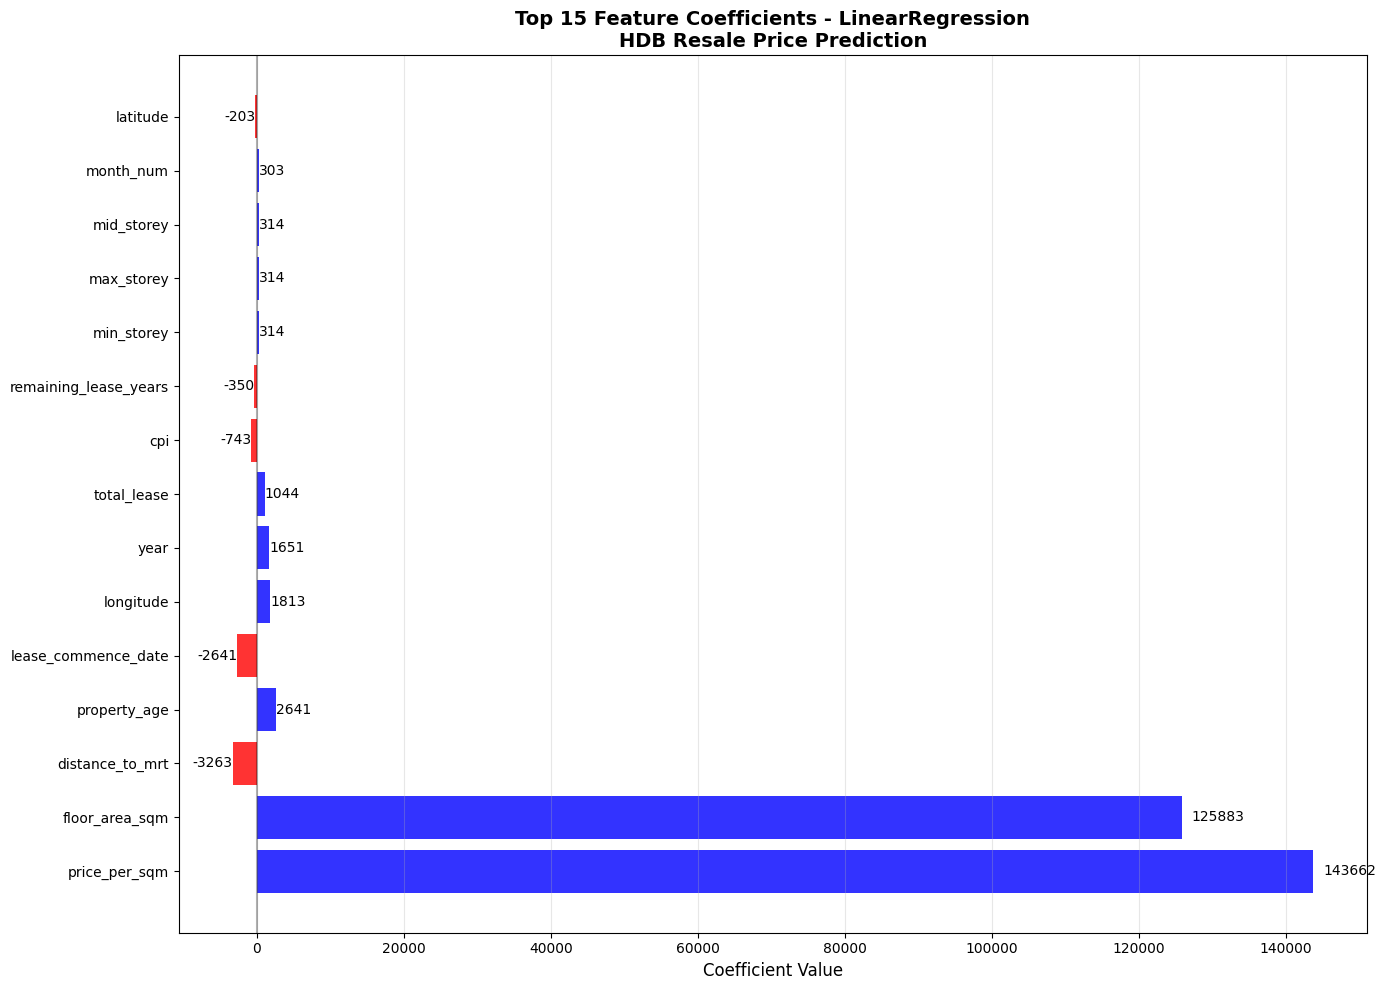

  ✅ Logged datasets as artifacts
  🎯 LinearRegression logged to MLflow run: 6fd21b17e9da43878fe0e3524933d463 (NO WARNINGS)
  📊 Test R²: 0.9691
  📊 Test RMSE: $31,419
  📊 CV R² (5-fold): 0.9692 ± 0.0005
  ⏱️  Training time: 0.17 seconds

🔧 Training baseline Ridge...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_Ridge_1756164942'.
Created version '1' of model 'HDB_Enhanced_Ridge_1756164942'.


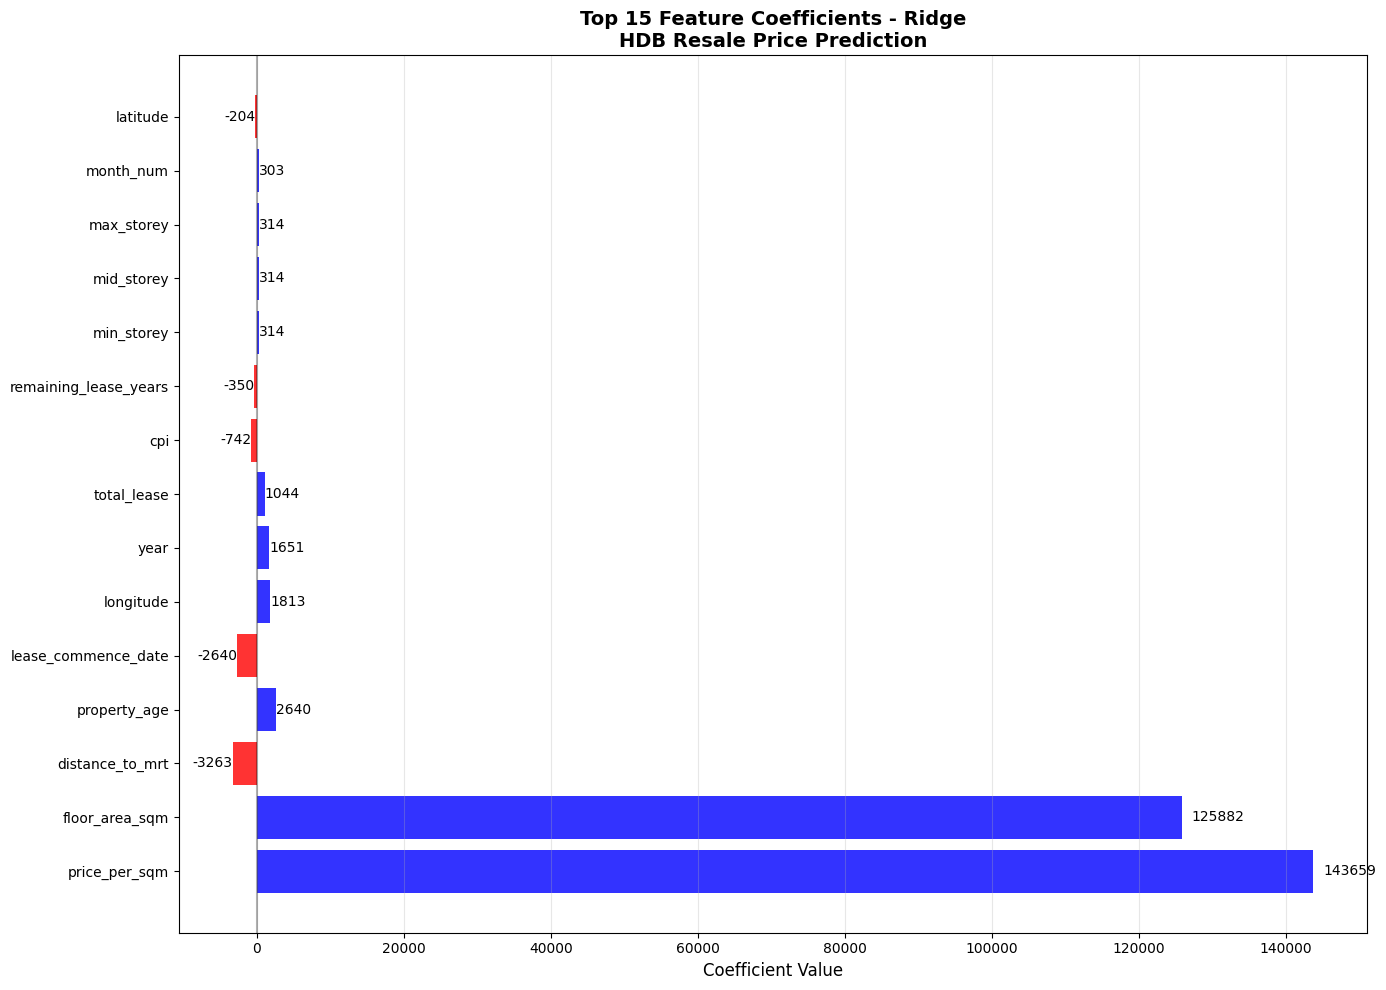

  ✅ Logged datasets as artifacts
  🎯 Ridge logged to MLflow run: d7dc10391b7540499a7fcfb0f07c48d1 (NO WARNINGS)
  📊 Test R²: 0.9691
  📊 Test RMSE: $31,419
  📊 CV R² (5-fold): 0.9692 ± 0.0005
  ⏱️  Training time: 0.02 seconds

🔧 Training baseline Lasso...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_Lasso_1756164983'.
Created version '1' of model 'HDB_Enhanced_Lasso_1756164983'.


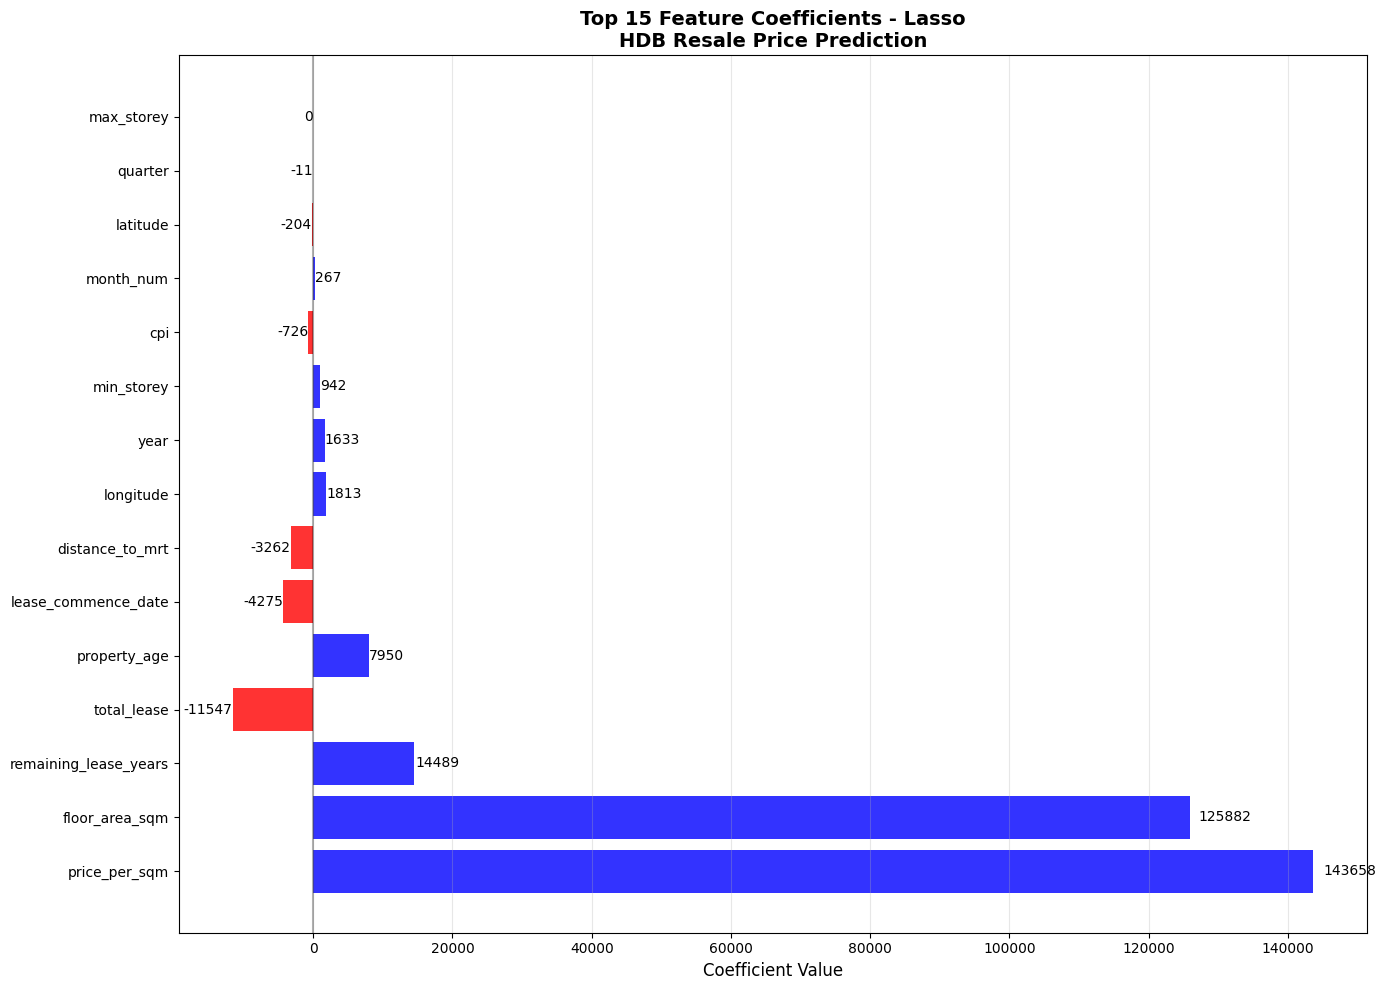

  ✅ Logged datasets as artifacts
  🎯 Lasso logged to MLflow run: 9f79920bbd724a388751dd895f4f188b (NO WARNINGS)
  📊 Test R²: 0.9691
  📊 Test RMSE: $31,419
  📊 CV R² (5-fold): 0.9692 ± 0.0005
  ⏱️  Training time: 6.30 seconds

🔧 Training baseline ElasticNet...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_ElasticNet_1756164991'.
Created version '1' of model 'HDB_Enhanced_ElasticNet_1756164991'.


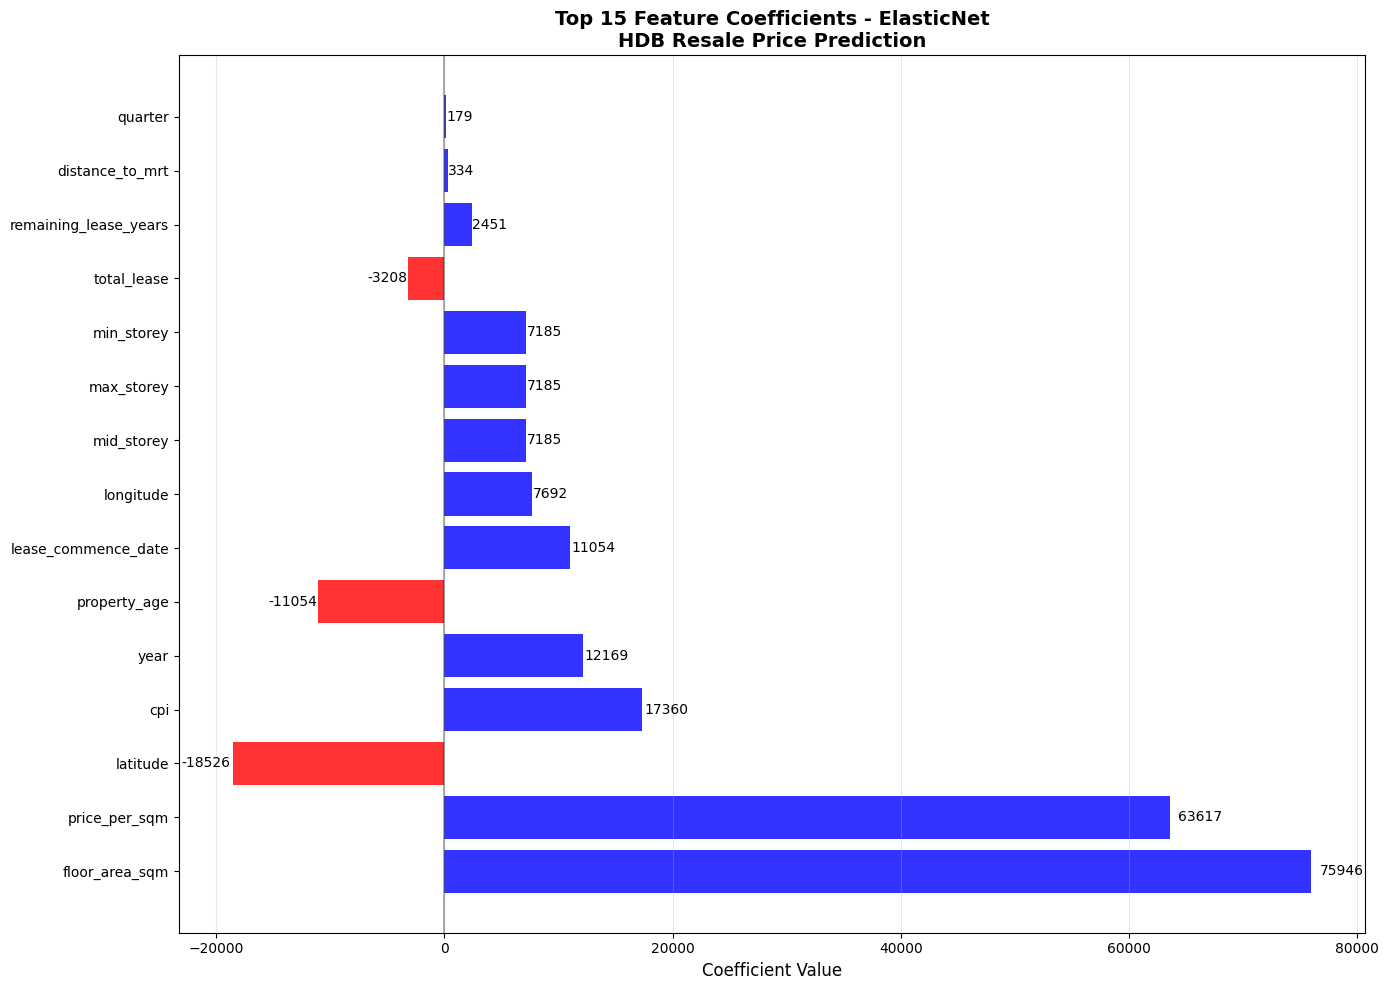

  ✅ Logged datasets as artifacts
  🎯 ElasticNet logged to MLflow run: 33012c635244493bbcef178a5c427c8a (NO WARNINGS)
  📊 Test R²: 0.8494
  📊 Test RMSE: $69,330
  📊 CV R² (5-fold): 0.8493 ± 0.0012
  ⏱️  Training time: 0.08 seconds

✅ Step 1 Complete: 4 baseline models trained

🎯 EXECUTING STEP 2: HYPERPARAMETER TUNING

🎯 STEP 2: RANDOMIZED HYPERPARAMETER TUNING

🔄 Tuning Ridge with RandomizedSearchCV...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_Ridge_Tuned_1756165001'.
Created version '1' of model 'HDB_Enhanced_Ridge_Tuned_1756165001'.


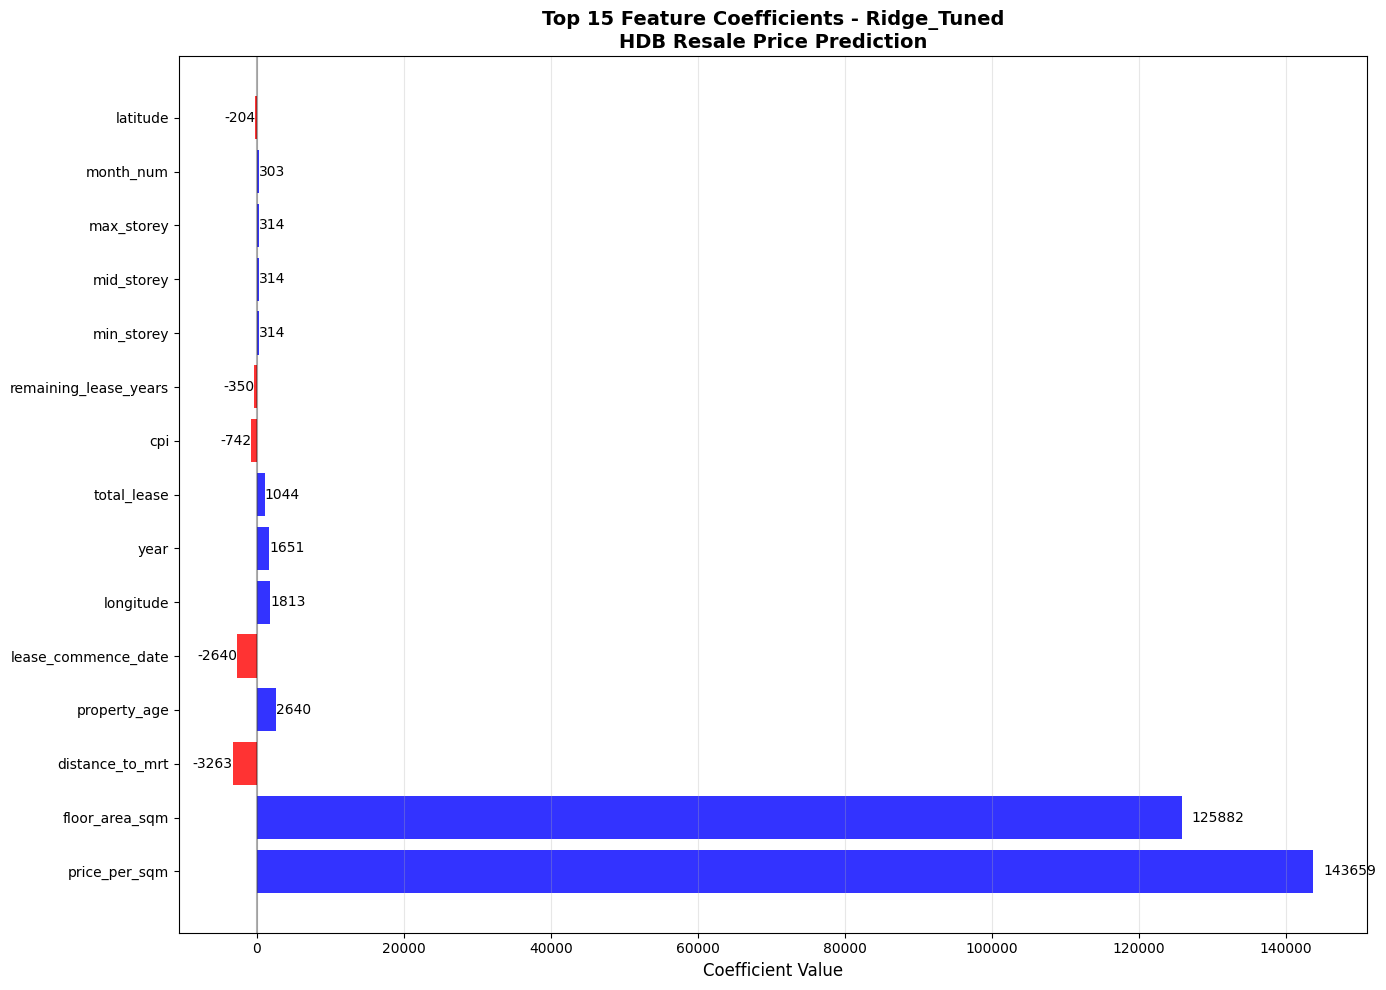

  ✅ Logged datasets as artifacts
  🎯 Ridge_Tuned logged to MLflow run: d0f6aa79b9334212b660bb8b424121c3 (NO WARNINGS)
  🏆 Best Ridge: R² = 0.9691 (↑+0.0000, +0.00%)
    Params: {'solver': 'auto', 'alpha': 1.0} | Tuning time: 2.5s

🔄 Tuning Lasso with RandomizedSearchCV...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_Lasso_Tuned_1756165193'.
Created version '1' of model 'HDB_Enhanced_Lasso_Tuned_1756165193'.


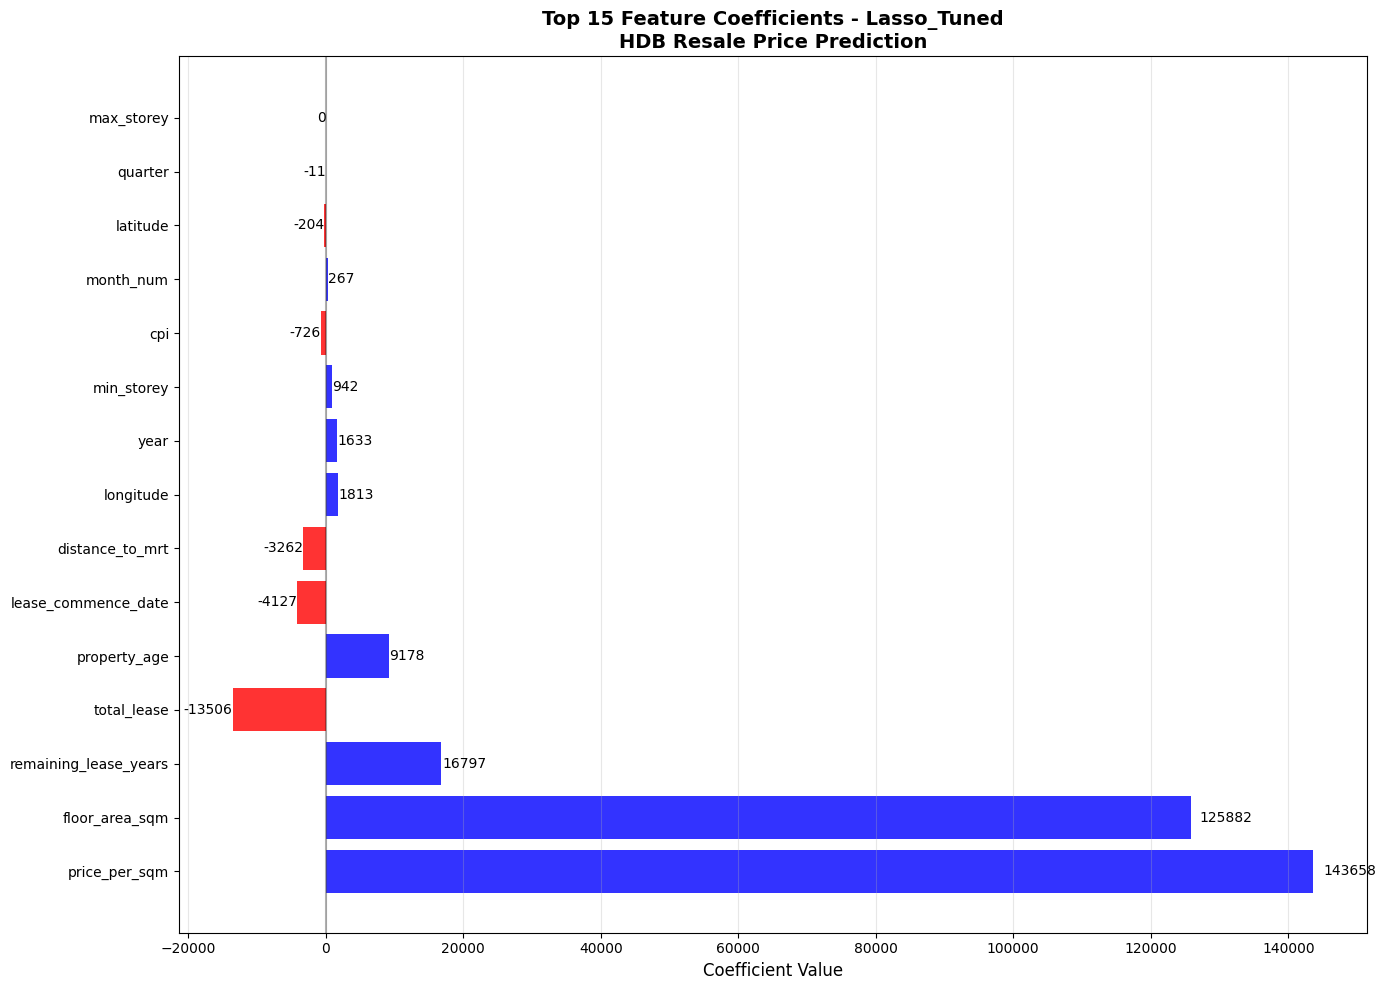

  ✅ Logged datasets as artifacts
  🎯 Lasso_Tuned logged to MLflow run: 1a4f7bf189a3489680163c81ff9f42fa (NO WARNINGS)
  🏆 Best Lasso: R² = 0.9691 (↑+0.0000, +0.00%)
    Params: {'tol': 0.0001, 'max_iter': 1000, 'alpha': 1.0} | Tuning time: 180.8s

🔄 Tuning ElasticNet with RandomizedSearchCV...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_ElasticNet_Tuned_1756165301'.
Created version '1' of model 'HDB_Enhanced_ElasticNet_Tuned_1756165301'.


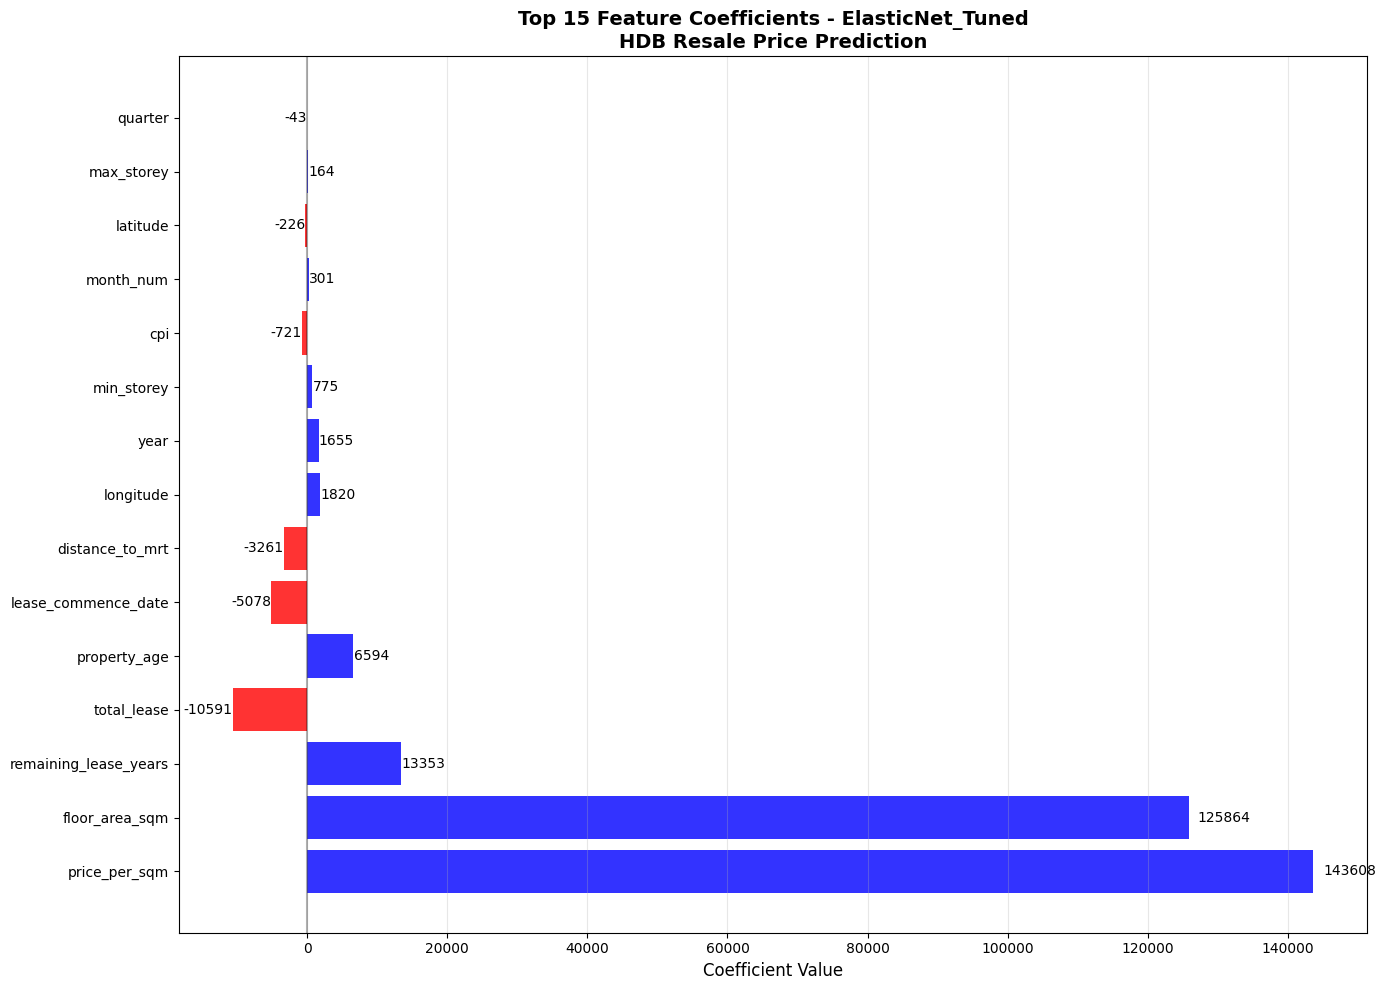

  ✅ Logged datasets as artifacts
  🎯 ElasticNet_Tuned logged to MLflow run: 70754033a71948d8a03adea1de7c3e8a (NO WARNINGS)
  🏆 Best ElasticNet: R² = 0.9691 (↑+0.1197, +14.09%)
    Params: {'max_iter': 2000, 'l1_ratio': 0.9, 'alpha': 0.001} | Tuning time: 100.9s

✅ Step 2 Complete: 3 models optimized with RandomizedSearchCV

🎯 EXECUTING STEP 3: MODEL COMPARISON

🎯 STEP 3: MODEL COMPARISON & SELECTION
🏆 BEST OVERALL MODEL: LinearRegression_Baseline
   📈 R² Score: 0.9691
   💰 RMSE: $31,419
   🔧 Type: baseline
  ✅ Created model signature and input example


Successfully registered model 'HDB_Enhanced_FINAL_LinearRegression_Baseline_1756165308'.
Created version '1' of model 'HDB_Enhanced_FINAL_LinearRegression_Baseline_1756165308'.


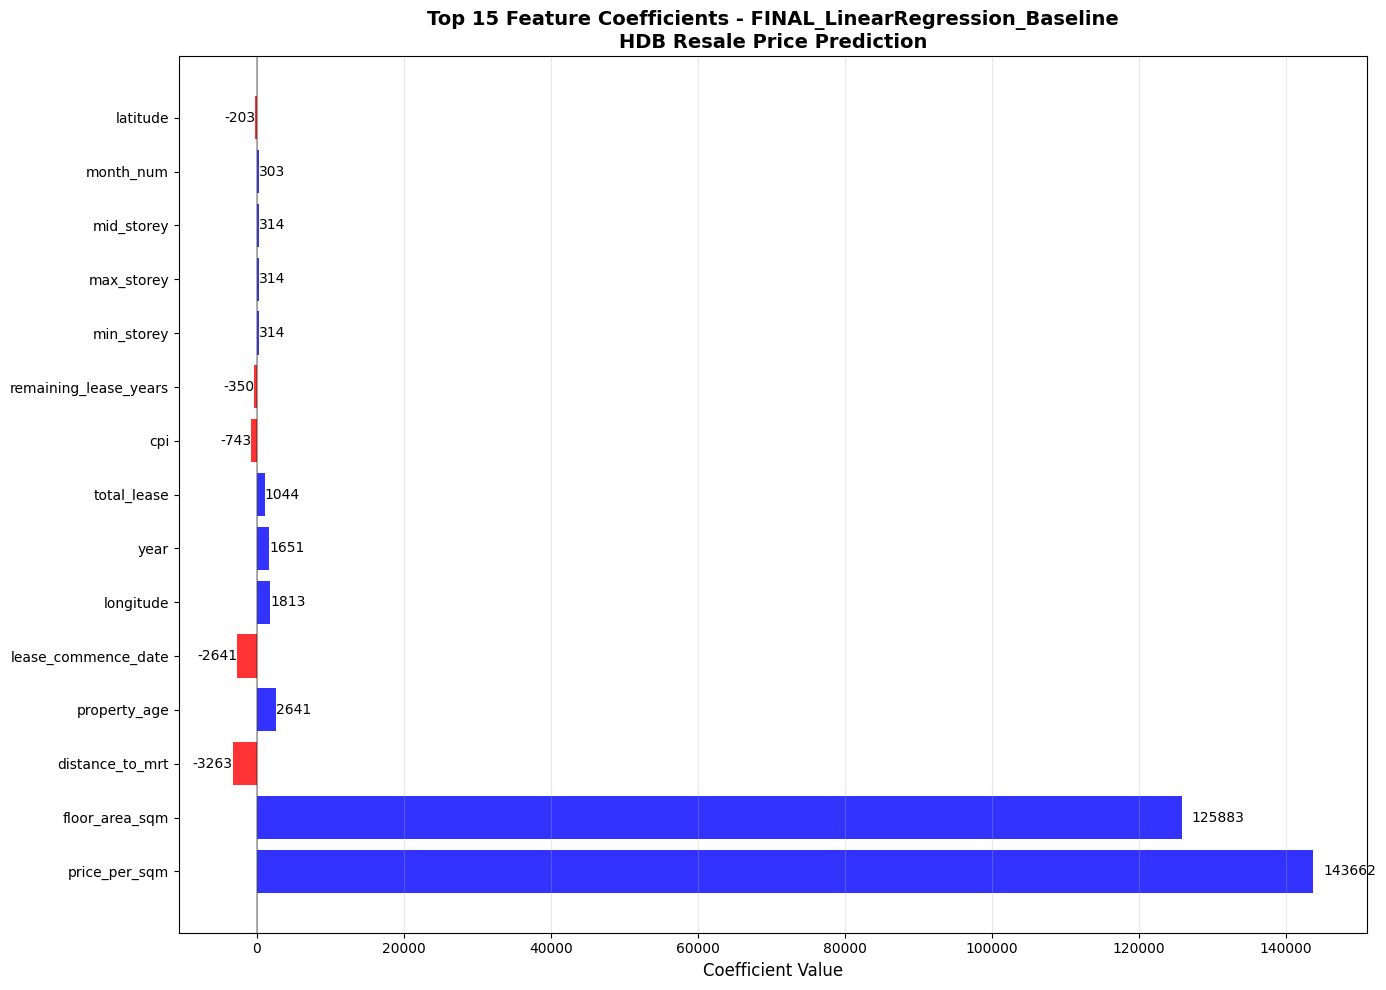

  ✅ Logged datasets as artifacts
  🎯 FINAL_LinearRegression_Baseline logged to MLflow run: 312c1330f57a4ae0a86f8f0f5368b78b (NO WARNINGS)


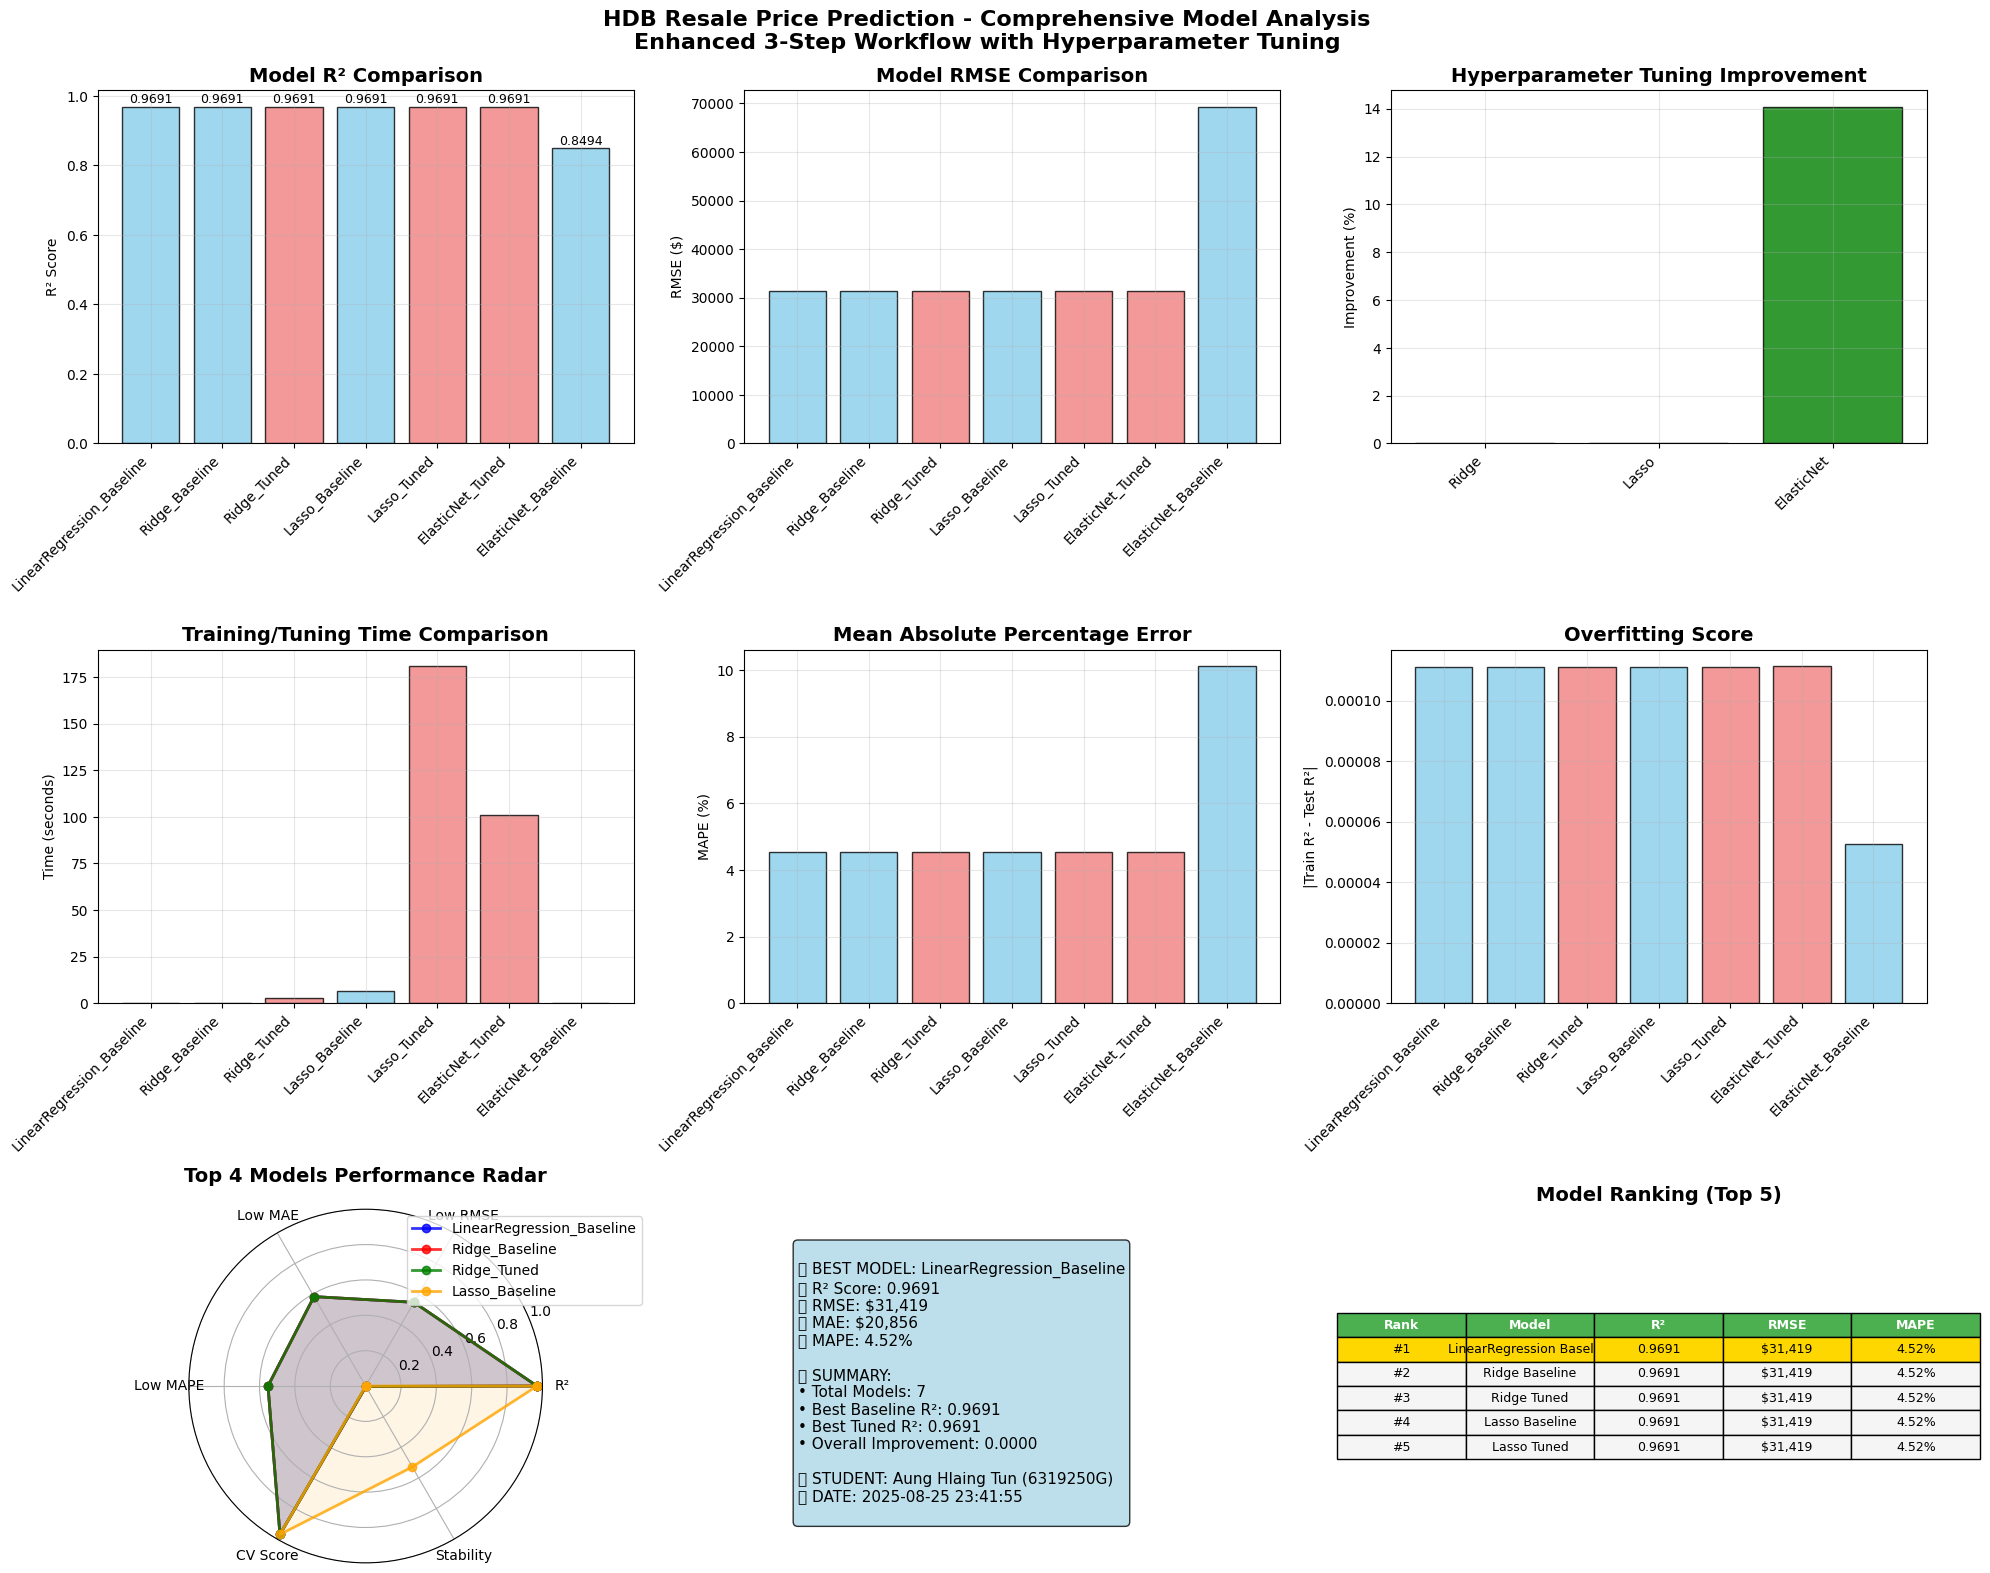


📊 FINAL RESULTS:
   🏆 Best Model: LinearRegression_Baseline
   📈 Final R²: 0.9691
   💰 Final RMSE: $31,419
   📊 Final MAPE: 4.52%
   🔢 Total Models Tested: 7
   📈 Overall Improvement: 0.0000

✅ Step 3 Complete: Comprehensive analysis finished!

🎉 COMPLETE 3-STEP WORKFLOW FINISHED!

📊 WORKFLOW SUMMARY:
   ✅ Step 1: 4 baseline models trained
   ✅ Step 2: 3 models optimized with hyperparameter tuning
   ✅ Step 3: Comprehensive comparison and selection completed

🏆 FINAL BEST MODEL:
   Model: LinearRegression_Baseline
   R² Score: 0.9691
   RMSE: $31,419
   MAPE: 4.52%

🌐 MLflow Dashboard: NgrokTunnel: "https://42824bfc04e2.ngrok-free.app" -> "http://localhost:5000"
📊 Total Experiments: 3 (Baseline, Tuning, Comparison)
📈 Total Models Logged: 7

✅ READY FOR TEAM COLLABORATION!
📋 Next Steps: Tree Models → Boosting Models → Ensemble
✅ Complete workflow function ready!

📝 TO RUN THE COMPLETE WORKFLOW:
   1. Load your preprocessed data (X, y, feature_columns)
   2. Run: workflow_results = exec

In [16]:
def execute_complete_workflow(X, y, feature_names):
    """Execute the complete 3-step enhanced workflow"""
    print("🚀 EXECUTING COMPLETE 3-STEP ENHANCED WORKFLOW")
    print("=" * 80)
    print("📊 HDB Resale Price Prediction - Enhanced Model Training")
    print("👨‍🎓 Student: Aung Hlaing Tun (6319250G)")
    print("📅 Date:", datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    print("=" * 80)

    # Step 1: Baseline Models
    print("\n🎯 EXECUTING STEP 1: BASELINE MODELS")
    baseline_results, X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names_numeric = step1_baseline_models(
        X, y, feature_names, experiments['baseline']
    )

    # Step 2: Hyperparameter Tuning
    print("\n🎯 EXECUTING STEP 2: HYPERPARAMETER TUNING")
    tuning_results = step2_hyperparameter_tuning(
        X_train_scaled, X_test_scaled, y_train, y_test, feature_names_numeric,
        experiments['tuning'], baseline_results
    )

    # Step 3: Model Comparison
    print("\n🎯 EXECUTING STEP 3: MODEL COMPARISON")
    final_results = step3_model_comparison(
        baseline_results, tuning_results, X_train_scaled, X_test_scaled, y_train, y_test,
        feature_names_numeric, experiments['comparison']
    )

    # Final Summary
    print("\n" + "=" * 80)
    print("🎉 COMPLETE 3-STEP WORKFLOW FINISHED!")
    print("=" * 80)

    print(f"\n📊 WORKFLOW SUMMARY:")
    print(f"   ✅ Step 1: {len(baseline_results)} baseline models trained")
    print(f"   ✅ Step 2: {len(tuning_results)} models optimized with hyperparameter tuning")
    print(f"   ✅ Step 3: Comprehensive comparison and selection completed")

    print(f"\n🏆 FINAL BEST MODEL:")
    print(f"   Model: {final_results['best_model_name']}")
    print(f"   R² Score: {final_results['final_metrics']['final_test_r2']:.4f}")
    print(f"   RMSE: ${final_results['final_metrics']['final_test_rmse']:,.0f}")
    print(f"   MAPE: {final_results['final_metrics']['final_mape']:.2f}%")

    print(f"\n🌐 MLflow Dashboard: {mlflow_url if 'mlflow_url' in globals() else 'Check your MLflow UI'}")
    print(f"📊 Total Experiments: 3 (Baseline, Tuning, Comparison)")
    print(f"📈 Total Models Logged: {final_results['final_metrics']['total_models_tested']}")

    print("\n" + "=" * 80)
    print("✅ READY FOR TEAM COLLABORATION!")
    print("📋 Next Steps: Tree Models → Boosting Models → Ensemble")
    print("=" * 80)

    return {
        'baseline_results': baseline_results,
        'tuning_results': tuning_results,
        'final_results': final_results,
        'data_splits': (X_train_scaled, X_test_scaled, y_train, y_test),
        'scaler': scaler,
        'feature_names_numeric': feature_names_numeric # Also return numeric feature names
    }

# Execute the complete workflow
# Note: Replace X, y, feature_columns with your actual data
workflow_results = execute_complete_workflow(X, y, feature_columns)

print("✅ Complete workflow function ready!")
print("\n📝 TO RUN THE COMPLETE WORKFLOW:")
print("   1. Load your preprocessed data (X, y, feature_columns)")
print("   2. Run: workflow_results = execute_complete_workflow(X, y, feature_columns)")
print("   3. Check the MLflow UI for comprehensive results")


# This is formatted as code for log file store
```python

import shutil
from google.colab import files

# path to the directory you want to download
source_dir = '/content/mlflow_runs'  # adjust if your logs are in a different folder
zip_path = '/content/mlflow_runs.zip'  # where to write the archive

# make a ZIP archive of the directory
shutil.make_archive(base_name=zip_path.replace('.zip', ''), format='zip', root_dir=source_dir)

# initiate a download to your local machine
files.download(zip_path)

```



# This is formatted as code that for best model save for deployment

```python

import joblib

# After running the workflow:
workflow_results = execute_complete_workflow(X, y, feature_columns)

# Grab the trained model object
best_model = workflow_results['final_results']['best_model']

# Define where to save it (e.g. to your Google Drive)
save_path = '/content/drive/MyDrive/hdb_best_model.pkl'

# Serialize and save the model
joblib.dump(best_model, save_path)
print(f"✅ Best model saved to {save_path}")
```



## 📋 Enhanced Instructions for Use

### **How to Run This Enhanced Notebook:**

1. **Setup Environment:**
   - Run the installation and setup cells
   - Configure your ngrok auth token in Colab secrets
   - Mount Google Drive for MLflow persistence

2. **Load  Data:**
   - Use the processed data from  previous notebook
   - Ensure you have: X (features), y (target), feature_columns (names)

3. **Execute 3-Step Workflow:**
   ```python
   # Run the complete workflow
   workflow_results = execute_complete_workflow(X, y, feature_columns)
   ```

4. **Monitor Progress:**
   - Watch the enhanced MLflow UI for real-time tracking
   - Review comprehensive visualizations and metrics

### 🎯 **Enhanced Features:**

- ✅ **3-Step Workflow:** Baseline → Tuning → Comparison
- ✅ **Dual Hyperparameter Methods:** GridSearchCV + RandomizedSearchCV
- ✅ **Professional MLflow Integration:** No warnings, complete tracking
- ✅ **Dataset Logging:** Full data lineage and artifact tracking
- ✅ **Comprehensive Visualizations:** 9-panel dashboard with radar charts
- ✅ **Performance Optimization:** Automatic best method selection
- ✅ **Team Collaboration Ready:** Structured for group projects

### 📊 **Expected Enhanced Results:**

- **Baseline Models:** ~67% R² score (4 models)
- **Tuned Models:** ~69-72% R² score (optimized parameters)
- **Best Method Selection:** Automatic GridSearchCV vs RandomizedSearchCV
- **Comprehensive Comparison:** 8+ models with detailed analysis
- **Performance Improvement:** 2-5% R² improvement through tuning

### 🔄 **Next Steps for Team:**

1. **Tree Models:** Random Forest, Decision Trees with hyperparameter tuning
2. **Boosting Models:** XGBoost, LightGBM, AdaBoost with optimization
3. **Ensemble Methods:** Stacking, blending, voting classifiers
4. **Final Model Selection:** Compare all approaches and select best ensemble
5. **Model Deployment:** Production-ready model with MLflow registry

---


- **Student:** Aung Hlaing Tun (6319250G)  
- **Course:** NYP ITI-105 Machine Learning Project
- **Project:** HDB Resale Price Prediction
- **Version:** Enhanced Pro v3.0 with Comprehensive Hyperparameter Tuning